# Exploratory Data Analysis (EDA) of Films

O objetivo principal deste projeto √© extrair, tratar e analisar dados de filmes listados no IMDb para gerar insights que possam ser √∫teis para profissionais da ind√∫stria cinematogr√°fica, pesquisadores, e entusiastas do cinema.

## Etapas do Projeto:

### Etapa 1: Coleta de dados
Gerar fun√ß√µes que interajam com a API OMDb para coletar de forma automatizada um conjunto de dados abrangente de filmes.

### Etapa 2: Limpeza e pr√©-processamento dos dados
Empregar m√©todos de limpeza de dados e pr√©-processamento para garantir que o conjunto de dados esteja em um estado ideal para an√°lise. Isso inclui tratamento de valores ausentes e transforma√ß√µes dos dados, assim como a identifica√ß√£o e remo√ß√£o de outliers.

### Etapa 3: An√°lise explorat√≥ria de dados (EDA) e visualiza√ß√µes
Implementar uma an√°lise explorat√≥ria abrangente, utilizando estat√≠sticas descritivas e t√©cnicas de an√°lise de dados para identificar padr√µes, tend√™ncias e poss√≠veis correla√ß√µes nos dados. Partindo de an√°lises unidimensionais at√© bidimensionais. Assim como, criar uma s√©rie de visualiza√ß√µes de dados impactantes e informativas que complementem e aprimorem os insights gerados durante a fase de an√°lise explorat√≥ria.

### Etapa 4: Conclus√µes
Com base na an√°lise explorat√≥ria de dados e nas visualiza√ß√µes, sintetizar os principais insights e descobertas obtidos a partir do conjunto de dados e sugerir √°reas de pesquisa e an√°lise futuras que podem ser exploradas para aprofundar o entendimento sobre o tema e gerar novos insights.

### Disclaimer
Este projeto foi desenvolvido exclusivamente para fins educacionais e de demonstra√ß√£o de habilidades. Ele n√£o tem nenhum objetivo comercial ou de lucro. Todos os dados utilizados neste projeto s√£o de dom√≠nio p√∫blico ou foram adquiridos e utilizados de acordo com as diretrizes e termos de uso fornecidos pelas respectivas fontes de dados.

As t√©cnicas de coleta de dados e an√°lise demonstradas aqui s√£o representativas das habilidades do autor em manipula√ß√£o de dados e desenvolvimento de software, e n√£o pretendem infringir quaisquer diretrizes ou leis de direitos autorais. Qualquer uso dos m√©todos ou dados apresentados neste projeto deve ser feito de acordo com as leis e regulamentos aplic√°veis.

#### Importando bibliotecas necess√°rias

In [2]:
import requests
import time
import matplotlib.pyplot as plt
import csv
import json
import pandas as pd
import seaborn as sns

#### Definindo fun√ß√µes √∫teis

In [3]:
# Fun√ß√£o para guardar os dados num ficheiro json
def save_data_to_file(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

# Fun√ß√£o para carregar os dados de um ficheiro json
def load_data_from_file(filename):
    with open(filename, 'r') as file:
        return json.load(file)

## Etapa 1: Coleta de Dados

### Definindo a amostra

- A coleta de dados √© realizada em duas etapas: inicialmente, coletamos os ID's dos filmes que queremos obter os dados. Estes IDs s√£o ent√£o utilizados como par√¢metros para solicita√ß√µes √† API OMDb, a fim de obter o conjunto de dados.
  
- A sele√ß√£o de filmes para esta an√°lise foi restrita √†queles que receberam um m√≠nimo de 150 avalia√ß√µes de usu√°rios. Este crit√©rio foi estabelecido para garantir que as notas dos filmes sejam confi√°veis e representativas da percep√ß√£o geral do p√∫blico sobre um determinado filme.

- O limite de 150 avalia√ß√µes serve como um ponto de equil√≠brio: √© alto o suficiente para conferir credibilidade √†s notas, mas baixo o suficiente para evitar a introdu√ß√£o de um vi√©s de popularidade. Isso permite que filmes menos conhecidos, mas ainda bem avaliados, sejam inclusos na an√°lise, oferecendo um panorama mais abrangente do cen√°rio cinematogr√°fico.

Nota: Durante a realiza√ß√£o deste projeto, tornei-me mais consciente das complexidades relacionadas √† propriedade intelectual e aos direitos autorais na coleta de dados. Embora n√£o tenha havido inten√ß√£o de infringir quaisquer direitos e o objetivo do projeto n√£o seja comercial, reconhe√ßo que √© crucial respeitar as diretrizes e pr√°ticas legais vigentes. Com isso em mente, optei por n√£o detalhar os m√©todos exatos de coleta dos IDs dos filmes. Tamb√©m afirmo que este projeto refor√ßou meu compromisso com a √©tica na coleta de dados e influenciar√° positivamente minha abordagem em futuros projetos.

### Definindo a fun√ß√£o get_movie_data() usada para interagir com a API OMDb

In [27]:
api_key = "xxxxx"

# Fun√ß√£o para obter dados de um √∫nico filme a partir de seu ID no IMDb usando a API OMDb
def get_movie_data(movie_id):
    max_retries = 3  # N√∫mero m√°ximo de tentativas
    retries = 0  # Contador inicial de tentativas
    while retries < max_retries:
        # Constr√≥i a URL da API usando a chave da API e o ID do filme
        url = f"http://www.omdbapi.com/?apikey={api_key}&i={movie_id}"

        # Faz uma requisi√ß√£o GET √† API para obter o JSON contendo os dados do filme
        response = requests.get(url)

        # Verifica se a requisi√ß√£o foi bem-sucedida (c√≥digo de status HTTP 200)
        if response.status_code == 200:
            # Converte a resposta JSON em um dicion√°rio Python
            movie_data = response.json()

            try:
                # Extrai os campos necess√°rios dos dados do filme
                titulo = movie_data['Title']
                ano = int(movie_data['Year']) 
                imdb_rating = float(movie_data['imdbRating']) if movie_data['imdbRating'] != 'N/A' else None
                imdb_votes = int(movie_data['imdbVotes'].replace(',', '')) if movie_data['imdbVotes'] != 'N/A' else None
                generos = movie_data['Genre'].split(', ')
                try: # Tentativa de extrair a dura√ß√£o em minutos
                    duracao = int(movie_data['Runtime'].split(' ')[0]) if movie_data['Runtime'] != 'N/A' else None
                except ValueError:  # Caso em que a dura√ß√£o vem em um formato inesperado
                    if 'S' in movie_data['Runtime']: # Verificando se a dura√ß√£o est√° em segundos ('S')
                        duracao = int(movie_data['Runtime'].split('S')[0]) / 60.0
                    else:
                        raise ValueError(f"Unexpected runtime format for movie ID {movie_id}: {movie_data['Runtime']}")
                diretor = movie_data['Director']

                # Retorna um dicion√°rio contendo os dados extra√≠dos
                return {'titulo': titulo, 'ano': ano, 'imdb_rating': imdb_rating, 'imdb_votes': imdb_votes, 
                        'generos': generos, 'duracao': duracao, 'diretor': diretor}

            # Captura o erro se algum campo n√£o estiver dispon√≠vel no JSON
            except KeyError:
                print(f"Error: Missing data for movie ID {movie_id}")
                return None

        # Caso a requisi√ß√£o √† API falhe, imprime o c√≥digo de status HTTP
        else:
            print(f"Error: Unable to fetch data for movie ID {movie_id}. Status code: {response.status_code}")
            retries += 1  # Incrementa o contador de tentativas
            time.sleep(5)  # Espera por 5 segundos antes de tentar novamente
    # Se o c√≥digo chegou at√© aqui, √© porque todas as tentativas falharam
    print(f"Error: Maximum number of attempts for movie ID {movie_id} exceeded.")
    return None

### Testando a fun√ß√£o

In [28]:
# Testamos a fun√ß√£o com o filme com o ID tt0099088 (Back to the Future III)
print(get_movie_data("tt0099088"))

{'titulo': 'Back to the Future Part III', 'ano': 1990, 'imdb_rating': 7.4, 'imdb_votes': 464728, 'generos': ['Adventure', 'Comedy', 'Sci-Fi'], 'duracao': 118, 'diretor': 'Robert Zemeckis'}


### Definindo a fun√ß√£o de coleta

In [6]:
# Fun√ß√£o para retomar a coleta de dados de filmes a partir de uma lista de IDs de filmes
def resume_data_collection(movie_ids, filename):
    # Tenta carregar dados previamente coletados a partir de um arquivo JSON
    # Se o arquivo n√£o existir, inicializa um novo dicion√°rio para armazenar os dados
    try:
        data = load_data_from_file(filename)
    except FileNotFoundError:
        data = {
            'titulo': [],
            'ano': [],
            'imdb_rating': [],
            'imdb_votes': [],
            'generos': [],
            'duracao': [],
            'diretor': []
        }

    # Determina o ponto de in√≠cio para retomar a coleta, baseado na quantidade de t√≠tulos j√° coletados
    start_index = len(data['titulo'])
    
    # Loop atrav√©s dos IDs de filmes para coletar informa√ß√µes
    for movie_id in movie_ids[start_index:]:
        # Chama a fun√ß√£o get_movie_data para obter informa√ß√µes de cada filme
        movie_info = get_movie_data(movie_id)
        
        # Se informa√ß√µes foram retornadas, armazena nos respectivos campos do dicion√°rio
        if movie_info is not None:
            data['titulo'].append(movie_info['titulo'])
            data['ano'].append(movie_info['ano'])
            data['imdb_rating'].append(movie_info['imdb_rating'])
            data['imdb_votes'].append(movie_info['imdb_votes'])
            data['generos'].append(movie_info['generos'])
            data['duracao'].append(movie_info['duracao'])
            data['diretor'].append(movie_info['diretor'])

        # Exibe o progresso da coleta e salva os dados temporariamente a cada 500 filmes coletados
        current_index = len(data['titulo'])
        if current_index % 500 == 0:
            print(f"Progress: Collected {current_index} out of {len(movie_ids)} movies.")
            save_data_to_file(data, filename)

    # Salva o dicion√°rio completo de dados coletados em um arquivo JSON ao final da execu√ß√£o
    save_data_to_file(data, filename)

    return data

In [29]:
# Aqui come√ßamos a coleta de dados.
# Como a coleta √© lenta, executamos esta c√©lula at√© termos coletado todos os dados desejados, 
# dessa forma podemos pausar o quanto quisermos.
data = resume_data_collection(movies_ids_list, 'collected_data.json')

Progress: Collected 82000 out of 94840 movies.
Progress: Collected 82500 out of 94840 movies.
Progress: Collected 83000 out of 94840 movies.
Progress: Collected 83500 out of 94840 movies.
Progress: Collected 84000 out of 94840 movies.
Progress: Collected 84500 out of 94840 movies.
Progress: Collected 85000 out of 94840 movies.
Progress: Collected 85500 out of 94840 movies.
Progress: Collected 86000 out of 94840 movies.
Progress: Collected 86500 out of 94840 movies.
Progress: Collected 87000 out of 94840 movies.
Progress: Collected 87500 out of 94840 movies.
Progress: Collected 88000 out of 94840 movies.
Progress: Collected 88500 out of 94840 movies.
Progress: Collected 89000 out of 94840 movies.
Progress: Collected 89500 out of 94840 movies.
Progress: Collected 90000 out of 94840 movies.
Progress: Collected 90500 out of 94840 movies.
Progress: Collected 91000 out of 94840 movies.
Progress: Collected 91500 out of 94840 movies.
Progress: Collected 92000 out of 94840 movies.
Progress: Col

In [ ]:
save_data_to_file(data, filename) # Salvando depois de coletar todos os IDs

In [6]:
# Aqui verificamos quantos t√≠tulos de filmes foram coletados at√© agora.
data1 = load_data_from_file('collected_data.json')
len(data1['titulo'])

94785

Alguns IDs n√£o foram encontrados na API, mesmo assim, foi poss√≠vel coletar dados de 94785 filmes, de um total de 94840

## Etapa 2: Limpeza e pr√©-processamento dos dados

### Utilizando a biblioteca Pandas para obter uma vis√£o geral dos dados

In [11]:
# Carregar o arquivo JSON em um DataFrame
data_dict = load_data_from_file('../../data/150_votes/raw/collected_data.json')
df = pd.DataFrame.from_dict(data_dict)

In [12]:
# Mostrar as primeiras linhas para uma vis√£o geral r√°pida
df.head()

titulo   ano  imdb_rating  imdb_votes  \
0                   Miss Jerry  1894          5.9       206.0   
1             The Passion Play  1903          6.4       611.0   
2  The Story of the Kelly Gang  1906          6.0       831.0   
3              Dante's Inferno  1911          7.0      3198.0   
4                    Pinocchio  1911          5.8       182.0   

                          generos  duracao  \
0                       [Romance]     45.0   
1              [Biography, Drama]     45.0   
2  [Action, Adventure, Biography]     70.0   
3     [Adventure, Drama, Fantasy]     71.0   
4                       [Fantasy]     50.0   

                                             diretor  
0                                    Alexander Black  
1                    Lucien Nonguet, Ferdinand Zecca  
2                                       Charles Tait  
3  Francesco Bertolini, Adolfo Padovan, Giuseppe ...  
4                                    Giulio Antamoro

In [13]:
# Exibir estat√≠sticas resumidas
df.describe(include='all')

titulo           ano   imdb_rating    imdb_votes  generos  \
count    94785  94785.000000  93614.000000  9.463700e+04    94785   
unique   86122           NaN           NaN           NaN     1202   
top     Mother           NaN           NaN           NaN  [Drama]   
freq        14           NaN           NaN           NaN    12719   
mean       NaN   1996.248689      5.850590  1.103854e+04      NaN   
std        NaN     24.555352      1.260838  6.200713e+04      NaN   
min        NaN   1894.000000      1.000000  5.000000e+00      NaN   
25%        NaN   1982.000000      5.100000  2.880000e+02      NaN   
50%        NaN   2005.000000      6.100000  6.660000e+02      NaN   
75%        NaN   2015.000000      6.700000  2.408000e+03      NaN   
max        NaN   2023.000000     10.000000  2.773480e+06      NaN   

             duracao       diretor  
count   93704.000000         94785  
unique           NaN         38931  
top              NaN  Jes√∫s Franco  
freq             NaN            92  
mean      100.819990           NaN  
std        23.294127           NaN  
min         0.350000           NaN  
25%        88.000000           NaN  
50%        96.000000           NaN  
75%       109.000000           NaN  
max      1440.000000           NaN

In [14]:
# Mostrar informa√ß√µes sobre tipos de dados e valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94785 entries, 0 to 94784
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titulo       94785 non-null  object 
 1   ano          94785 non-null  int64  
 2   imdb_rating  93614 non-null  float64
 3   imdb_votes   94637 non-null  float64
 4   generos      94785 non-null  object 
 5   duracao      93704 non-null  float64
 6   diretor      94785 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.1+ MB


### Verifica√ß√£o de Dados Faltantes

In [15]:
# Verificar dados faltantes em cada coluna
df.isnull().sum()

titulo            0
ano               0
imdb_rating    1171
imdb_votes      148
generos           0
duracao        1081
diretor           0
dtype: int64

In [16]:
df = df.dropna() # Removendo as linhas com dados faltantes

In [17]:
# Verificar dados faltantes em cada coluna
df.isnull().sum()

titulo         0
ano            0
imdb_rating    0
imdb_votes     0
generos        0
duracao        0
diretor        0
dtype: int64

In [18]:
# Verificando a quantidade de linhas e colunas
df.shape

(92716, 7)

In [19]:
# Iterando sobre todas as colunas para retirar valores N/A em forma de string
for col in df.columns:
    mask = df[col].apply(lambda x: 'N/A' not in x if isinstance(x, (list, str)) else True)
    df = df[mask]

In [20]:
# Verificando o resultado ap√≥s aplicar a m√°scara a todas as colunas
df.shape

(92637, 7)

In [122]:
# Verificar dados faltantes em cada coluna
df.isnull().sum()

titulo         0
ano            0
imdb_rating    0
imdb_votes     0
generos        0
duracao        0
diretor        0
dtype: int64

O conjunto de dados apresenta algumas linhas com valores faltantes. A estrat√©gia adotada √© remover essas linhas para simplificar as an√°lises estat√≠sticas posteriores. O conjunto de dados possui um volume consider√°vel de dados, tornando esta abordagem vi√°vel e minimizando o impacto potencial na qualidade dos insights derivados da an√°lise.

### Modificando a coluna 'generos'

#### Como a coluna 'generos' possui uma lista de g√™neros, iremos separ√°-los em colunas diferentes

In [21]:
# Criar novas colunas para os g√™neros prim√°rio, secund√°rio e terci√°rio
df['genero_primario'] = df['generos'].apply(lambda x: x[0] if len(x) > 0 else None)
df['genero_secundario'] = df['generos'].apply(lambda x: x[1] if len(x) > 1 else None)
df['genero_terciario'] = df['generos'].apply(lambda x: x[2] if len(x) > 2 else None)

# Remover a coluna original 'generos'
df.drop(columns=['generos'], inplace=True)

In [22]:
# Verificar as primeiras linhas do novo DataFrame para confirmar as altera√ß√µes
df.head()

titulo   ano  imdb_rating  imdb_votes  duracao  \
0                   Miss Jerry  1894          5.9       206.0     45.0   
1             The Passion Play  1903          6.4       611.0     45.0   
2  The Story of the Kelly Gang  1906          6.0       831.0     70.0   
3              Dante's Inferno  1911          7.0      3198.0     71.0   
4                    Pinocchio  1911          5.8       182.0     50.0   

                                             diretor genero_primario  \
0                                    Alexander Black         Romance   
1                    Lucien Nonguet, Ferdinand Zecca       Biography   
2                                       Charles Tait          Action   
3  Francesco Bertolini, Adolfo Padovan, Giuseppe ...       Adventure   
4                                    Giulio Antamoro         Fantasy   

  genero_secundario genero_terciario  
0              None             None  
1             Drama             None  
2         Adventure        Biography  
3             Drama          Fantasy  
4              None             None

### Verificando duplicatas

In [23]:
# Contar o n√∫mero de linhas duplicadas
df.duplicated().sum()

0

### Verificando os tipos dos dados

In [24]:
# Verificar os tipos de dados das colunas no DataFrame
df.dtypes

titulo                object
ano                    int64
imdb_rating          float64
imdb_votes           float64
duracao              float64
diretor               object
genero_primario       object
genero_secundario     object
genero_terciario      object
dtype: object

In [25]:
# Convertendo a coluna 'imdb_votes' para inteiros, mantendo NaNs
df['imdb_votes'] = df['imdb_votes'].astype('int64')

In [26]:
# Verificando novamente os dados
df.dtypes

titulo                object
ano                    int64
imdb_rating          float64
imdb_votes             int64
duracao              float64
diretor               object
genero_primario       object
genero_secundario     object
genero_terciario      object
dtype: object

### Detec√ß√£o de Outliers

In [27]:
# Fun√ß√£o para calcular os limites para outliers com base no IQR
def calculate_iqr_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [28]:
# Calcular os limites para outliers para as colunas "imdb_rating" e "duracao"
imdb_rating_lower, imdb_rating_upper = calculate_iqr_bounds(df['imdb_rating'])
duracao_lower, duracao_upper = calculate_iqr_bounds(df['duracao'])

# Identificar os outliers
outliers_imdb_rating = df[(df['imdb_rating'] < imdb_rating_lower) | (df['imdb_rating'] > imdb_rating_upper)]
outliers_duracao = df[(df['duracao'] < duracao_lower) | (df['duracao'] > duracao_upper)]

# Exibir os limites e o n√∫mero de outliers para cada coluna
imdb_rating_lower, imdb_rating_upper, len(outliers_imdb_rating), duracao_lower, duracao_upper, len(outliers_duracao)

(2.699999999999999, 9.100000000000001, 1526, 56.5, 140.5, 5753)

Utilizando o m√©todo do Intervalo Interquartil (IQR), obtivemos as seguintes informa√ß√µes sobre outliers nas colunas selecionadas:

### Para `imdb_rating`:
- Limite Inferior: \(2.7\)
- Limite Superior: \(9.1\)
- N√∫mero de Outliers: \(1526\)

### Para `duracao`:
- Limite Inferior: \(56.5\) minutos
- Limite Superior: \(140.5\) minutos
- N√∫mero de Outliers: \(5753\)

In [29]:
# Filtrando os outliers das colunas "imdb_rating" e "duracao"
df_filtered = df[(df['imdb_rating'] >= imdb_rating_lower) & (df['imdb_rating'] <= imdb_rating_upper)]
df_filtered = df_filtered[(df_filtered['duracao'] >= duracao_lower) & (df_filtered['duracao'] <= duracao_upper)]

In [30]:
# Exibir as primeiras linhas do DataFrame ap√≥s a remo√ß√£o dos outliers
df_filtered.shape

(85430, 9)

In [31]:
df.isnull().sum()

titulo                   0
ano                      0
imdb_rating              0
imdb_votes               0
duracao                  0
diretor                  0
genero_primario          0
genero_secundario    26269
genero_terciario     55869
dtype: int64

In [32]:
df_filtered.isnull().sum()

titulo                   0
ano                      0
imdb_rating              0
imdb_votes               0
duracao                  0
diretor                  0
genero_primario          0
genero_secundario    24537
genero_terciario     52029
dtype: int64

### Salvando o dataframe

In [33]:
# Salvar o dataframe no formato Pickle
df.to_pickle('../data/processed/dados_limpos.pkl')

# Salvar o dataframe no formato Excel
df.to_excel('../data/processed/dados_limpos.xlsx', index=False)

In [34]:
# Salvar o dataframe filtrado no formato Pickle
df_filtered.to_pickle('../data/processed/dados_limpos_filtrados.pkl')

# Salvar o dataframe filtrado no formato Excel
df_filtered.to_excel('../data/processed/dados_limpos_filtrados.xlsx', index=False)

### Vamos salvar os outliers em arquivos separados para an√°lise posterior

In [35]:
# Salvar outliers de imdb_rating em formato Pickle e Excel
outliers_imdb_rating.to_pickle('../data/outliers/outliers_imdb_rating.pkl')
outliers_imdb_rating.to_excel('../data/outliers/outliers_imdb_rating.xlsx', index=False)

# Salvar outliers de duracao em formato Pickle e Excel
outliers_duracao.to_pickle('../data/outliers/outliers_duracao.pkl')
outliers_duracao.to_excel('../data/outliers/outliers_duracao.xlsx', index=False)

Decidi prosseguir com a an√°lise removendo os outliers identificados atrav√©s do m√©todo do intervalo interquartil (IQR). Os outliers podem distorcer os resultados e afetar a qualidade das an√°lises estat√≠sticas. Para manter a integridade do estudo, salvei os dados dos outliers em um arquivo separado. Isso permitir√° uma an√°lise mais aprofundada no futuro, caso seja necess√°rio.

# Etapa 3: An√°lise explorat√≥ria de dados (EDA) e visualiza√ß√µes

## Carregando os dados limpos e filtrados

In [4]:
df = pd.read_pickle('../data/processed/dados_limpos_filtrados.pkl')

In [5]:
df.isna().sum()

titulo                   0
ano                      0
imdb_rating              0
imdb_votes               0
duracao                  0
diretor                  0
genero_primario          0
genero_secundario    24537
genero_terciario     52029
dtype: int64

## Estat√≠sticas descritivas b√°sicas

In [6]:
# Obter estat√≠sticas descritivas das colunas num√©ricas
# Isso inclui contagem, m√©dia, desvio padr√£o, m√≠nimo, 25¬∫ percentil, mediana (50¬∫ percentil), 75¬∫ percentil e m√°ximo
estatisticas_numericas = df.describe()

# Para colunas categ√≥ricas (neste caso, as colunas de g√™nero e diretor), podemos obter a contagem de valores √∫nicos e o valor mais frequente
estatisticas_categoricas = df[['genero_primario', 'genero_secundario', 'genero_terciario', 'diretor']].describe(include='object')

print(estatisticas_numericas)
print(estatisticas_categoricas)

                ano   imdb_rating    imdb_votes       duracao
count  85430.000000  85430.000000  8.543000e+04  85430.000000
mean    1995.490718      5.871018  1.035125e+04     97.622404
std       24.751853      1.151290  5.309136e+04     15.527476
min     1906.000000      2.700000  5.000000e+00     57.000000
25%     1981.000000      5.200000  2.920000e+02     88.000000
50%     2005.000000      6.000000  6.800000e+02     95.000000
75%     2015.000000      6.700000  2.460000e+03    106.000000
max     2023.000000      9.100000  2.208722e+06    140.000000
       genero_primario genero_secundario genero_terciario       diretor
count            85430             60893            33401         85430
unique              21                24               21         35933
top              Drama             Drama         Thriller  Jes√∫s Franco
freq             25304             18398             6274            92


### Estat√≠sticas Num√©ricas:

1. **Ano (`ano`)**
    - A base de dados cont√©m filmes lan√ßados entre 1906 e 2023.
    - A m√©dia de lan√ßamento dos filmes √© aproximadamente 1996, o que sugere que a cole√ß√£o √© bastante diversificada em termos de √©poca.
    

2. **Classifica√ß√£o do IMDb (`imdb_rating`)**
    - A m√©dia da classifica√ß√£o √© de aproximadamente 5.87, com um desvio padr√£o de 1.15, indicando uma varia√ß√£o moderada nas classifica√ß√µes.
    - As classifica√ß√µes variam de 2.7 a 9.1, conforme os limites definidos durante a remo√ß√£o de outliers.


3. **N√∫mero de Votos no IMDb (`imdb_votes`)**
    - O n√∫mero m√©dio de votos por filme √© de aproximadamente 10,344.
    - O n√∫mero de votos varia significativamente, com um desvio padr√£o elevado de 53,072.
  

4. **Dura√ß√£o (`duracao`)**
    - A dura√ß√£o m√©dia dos filmes √© de aproximadamente 98 minutos.
    - A dura√ß√£o varia de 57 a 140 minutos, com um desvio padr√£o de aproximadamente 15.5 minutos.


### Estat√≠sticas Categ√≥ricas:

1. **G√™nero Prim√°rio (`genero_primario`)**
    - O conjunto de dados cont√©m 21 g√™neros prim√°rios √∫nicos.
    - "Drama" √© o g√™nero mais comum, aparecendo 25,311 vezes.


2. **G√™nero Secund√°rio (`genero_secundario`)**
    - Existem 24 g√™neros secund√°rios √∫nicos.
    - "Drama" tamb√©m √© o g√™nero secund√°rio mais comum.


3. **G√™nero Terci√°rio (`genero_terciario`)**
    - Existem 21 g√™neros terci√°rios √∫nicos.
    - "Thriller" √© o g√™nero terci√°rio mais comum.


4. **Diretor (`diretor`)**
    - H√° 35,940 diretores √∫nicos no conjunto de dados.
    - Jes√∫s Franco √© o diretor mais frequentemente listado, com 92 filmes.

# An√°lises Unidimensionais

## Vari√°veis num√©ricas (ano, classifica√ß√£o, votos e dura√ß√£o):

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


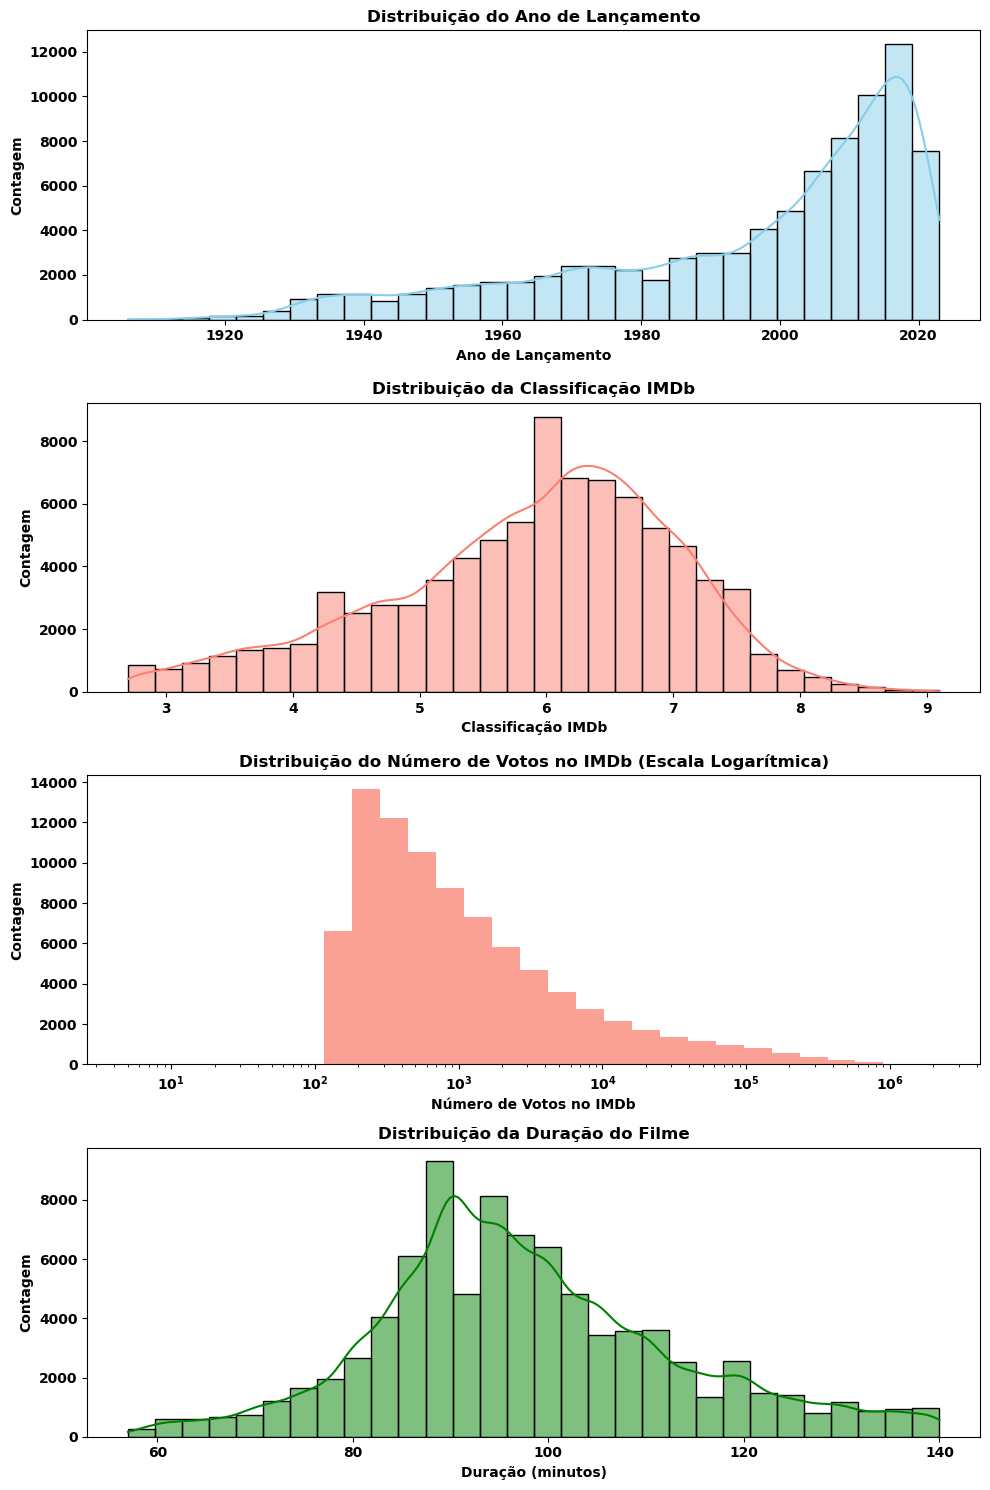

In [7]:
# Criar uma figura com subplots
fig, ax = plt.subplots(4, 1, figsize=(10, 15))

# Histograma para o ano de lan√ßamento
sns.histplot(df['ano'], ax=ax[0], kde=True, color='skyblue', bins=30)
ax[0].set_title('Distribui√ß√£o do Ano de Lan√ßamento')
ax[0].set_xlabel('Ano de Lan√ßamento')
ax[0].set_ylabel('Contagem')

# Histograma para a classifica√ß√£o IMDb
sns.histplot(df['imdb_rating'], ax=ax[1], kde=True, color='salmon', bins=30)
ax[1].set_title('Distribui√ß√£o da Classifica√ß√£o IMDb')
ax[1].set_xlabel('Classifica√ß√£o IMDb')
ax[1].set_ylabel('Contagem')

# Histograma para o n√∫mero de votos no IMDb
# Calcular as bordas dos bins manualmente usando uma escala logar√≠tmica
min_val = df['imdb_votes'].min()
max_val = df['imdb_votes'].max()
bins_log_manual = [min_val * (max_val/min_val)**(i/29) for i in range(30)]

# Desenhar o histograma
sns.histplot(df['imdb_votes'], bins=bins_log_manual, kde=False, color='salmon', ax=ax[2])
ax[2].set_title('Distribui√ß√£o do N√∫mero de Votos no IMDb (Escala Logar√≠tmica)')
ax[2].set_xlabel('N√∫mero de Votos no IMDb')
ax[2].set_ylabel('Contagem')
ax[2].set_xscale('log')  # Escala logar√≠tmica para o eixo x

# Histograma para a dura√ß√£o do filme
sns.histplot(df['duracao'], ax=ax[3], kde=True, color='green', bins=30)
ax[3].set_title('Distribui√ß√£o da Dura√ß√£o do Filme')
ax[3].set_xlabel('Dura√ß√£o (minutos)')
ax[3].set_ylabel('Contagem')

# Ajustar o layout
plt.tight_layout()
plt.show()


**Insights gerais:**

**1. Distribui√ß√£o do Ano de Lan√ßamento**:
- A maioria dos filmes no conjunto de dados foi lan√ßada ap√≥s o ano 2000.
- H√° uma tend√™ncia crescente de filmes ap√≥s esse ano. Isso pode sugerir que o avan√ßo tecnol√≥gico facilitou a produ√ß√£o de filmes, resultando em um aumento no n√∫mero de lan√ßamentos.
- A diminui√ß√£o recente se deve em rela√ß√£o √† pandemia do COVID-19, que resultou em uma paralisa√ß√£o nas  produ√ß√µes.

**2. Distribui√ß√£o da Classifica√ß√£o IMDb**:
- A distribui√ß√£o das classifica√ß√µes do IMDb √© aproximadamente normal.
- A maior parte dos filmes tem classifica√ß√µes entre 5 e 7.
- A distribui√ß√£o √© levemente inclinada para a esquerda, o que indica que filmes com classifica√ß√µes extremamente altas s√£o mais raros do que aqueles com classifica√ß√µes baixas.

**3. Distribui√ß√£o do N√∫mero de Votos no IMDb**:
- A coleta foi filtrada para incluir apenas filmes com pelo menos 150 votos.
- O uso da escala logar√≠tmica no eixo \(x\) revela que a maioria dos filmes tem relativamente poucos votos.
- Isso sugere que a quantidade de votos n√£o √© necessariamente um indicativo de representatividade ou qualidade do filme.

**4. Distribui√ß√£o da Dura√ß√£o do Filme**:
- A dura√ß√£o dos filmes segue uma distribui√ß√£o normal, centrada em torno de 95 a 100 minutos.
- A maioria dos filmes tem uma dura√ß√£o que varia de 80 a 120 minutos.
- Isso sugere que a "dura√ß√£o padr√£o" para a maioria dos filmes √© de aproximadamente 1,5 a 2 horas.

## Vari√°veis categ√≥ricas (g√™neros prim√°rios, subg√™neros e diretores):

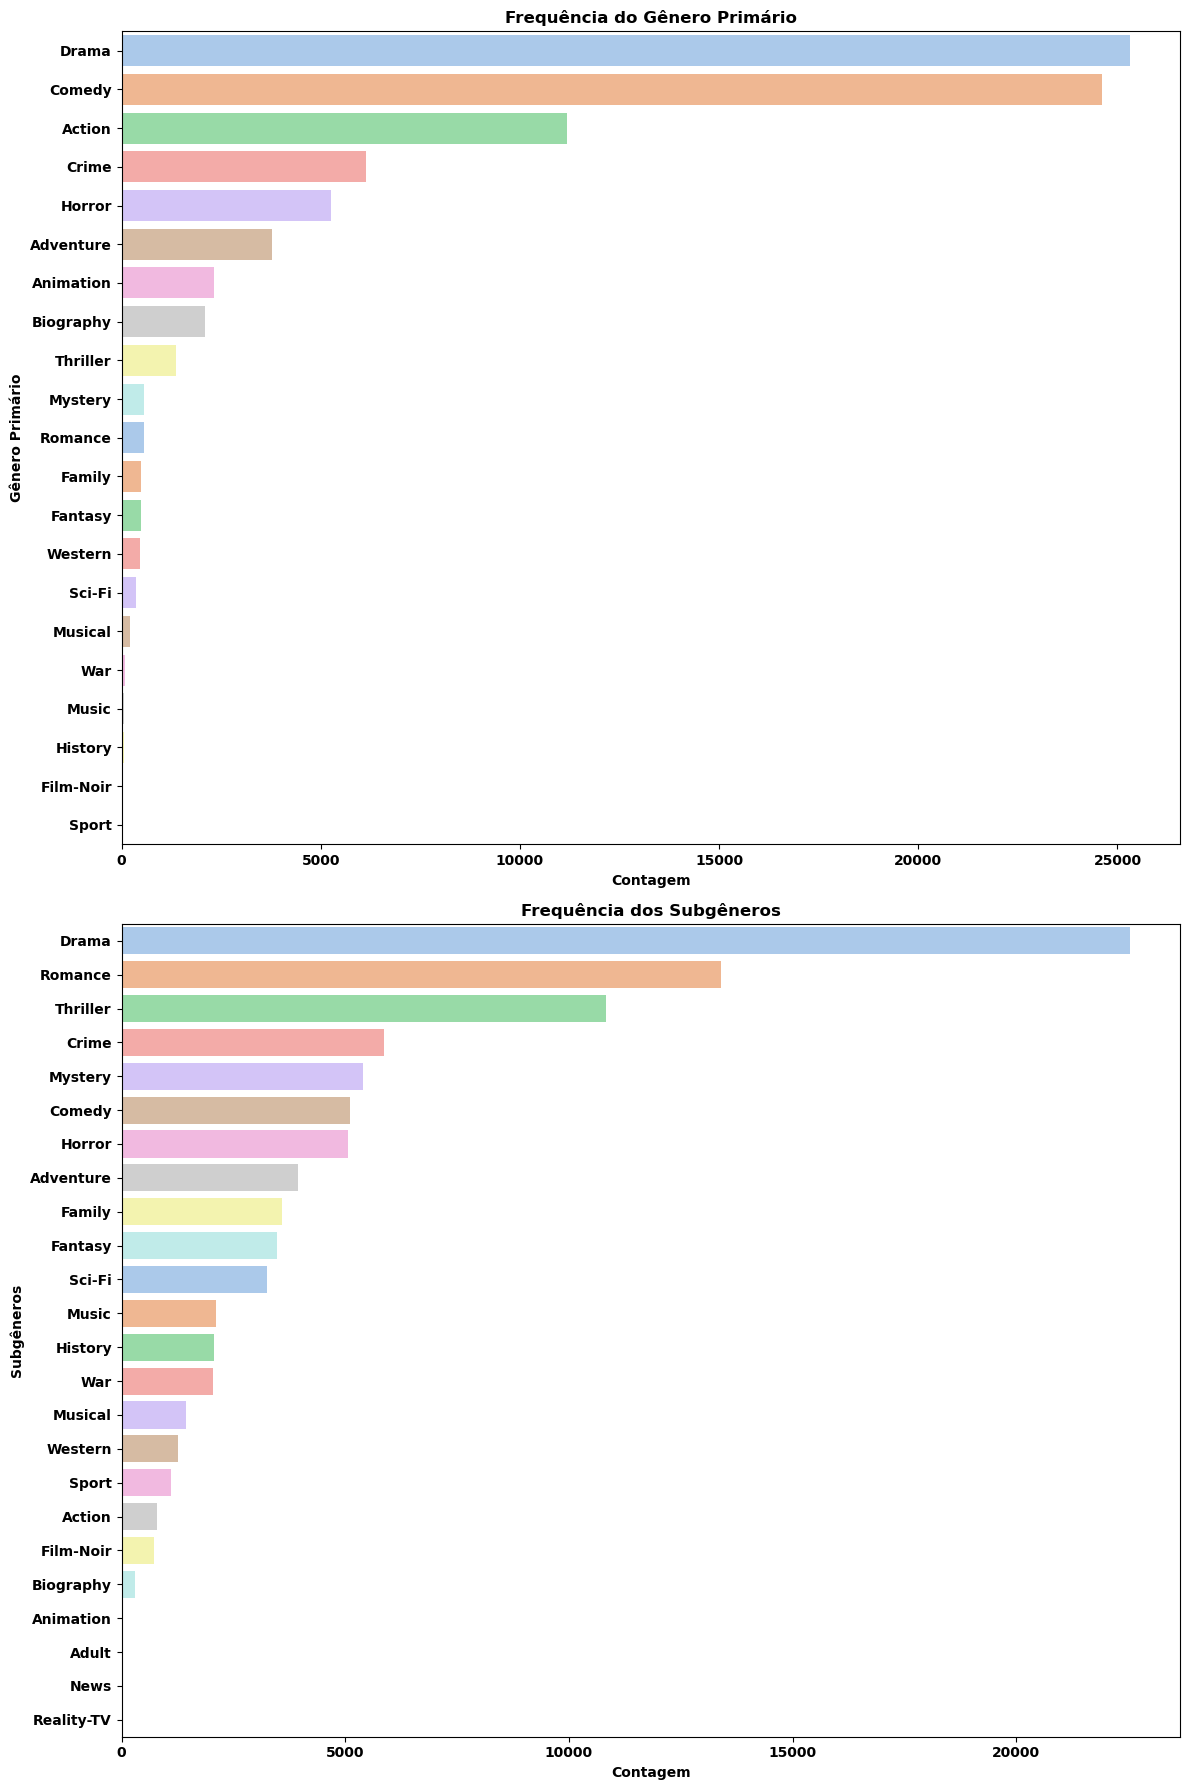

In [8]:
# Criar uma figura com subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 18))

# Gr√°fico de barras para o g√™nero prim√°rio
sns.countplot(y=df['genero_primario'], ax=ax[0], order=df['genero_primario'].value_counts().index, palette='pastel')
ax[0].set_title('Frequ√™ncia do G√™nero Prim√°rio')
ax[0].set_xlabel('Contagem')
ax[0].set_ylabel('G√™nero Prim√°rio')

# Concatenar as s√©ries 'genero_secundario' e 'genero_terciario' e obter a contagem de valores
subgeneros_counts = pd.concat([df['genero_secundario'], df['genero_terciario']]).value_counts()

# Gr√°fico de barras para a contagem dos subg√™neros usando o segundo subplot
sns.barplot(y=subgeneros_counts.index, x=subgeneros_counts.values, palette='pastel', ax=ax[1])
ax[1].set_title('Frequ√™ncia dos Subg√™neros')
ax[1].set_xlabel('Contagem')
ax[1].set_ylabel('Subg√™neros')

# Ajustar o layout
plt.tight_layout()
plt.show()


**Insights Gerais**:
- O **Drama** √© um g√™nero extremamente popular, tanto como g√™nero principal quanto como subg√™nero. Isso pode indicar que muitos filmes buscam contar hist√≥rias profundas e envolventes que ressoam emocionalmente com o p√∫blico.
- A presen√ßa significativa de **Romance** e **Thriller** como subg√™neros sugere que muitos filmes, independentemente de seu g√™nero principal, incorporam elementos rom√¢nticos e/ou de suspense, possivelmente para ampliar seu apelo ao p√∫blico. √â interessante ressaltar que estes g√™neros s√£o pouco usados como g√™nero principal, o que sugere que eles n√£o s√£o suficientes para sustentar uma trama por si s√≥.
- A diversidade de g√™neros e subg√™neros reflete a riqueza e variedade do cinema. Filmes frequentemente mesclam diferentes g√™neros para criar narrativas complexas e multidimensionais.

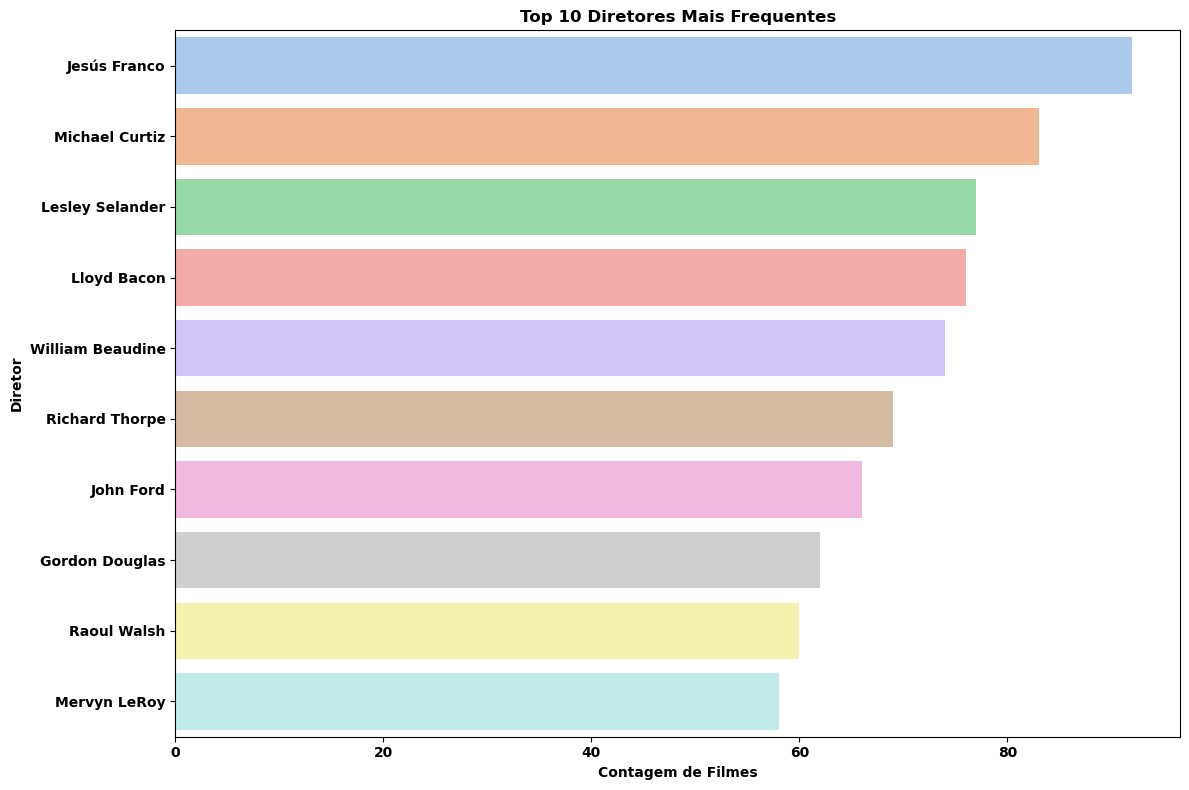

In [9]:
# Gr√°fico de barras para os 10 diretores mais frequentes

plt.figure(figsize=(12, 8))
sns.countplot(y=df['diretor'], order=df['diretor'].value_counts().iloc[:10].index, palette='pastel')
plt.title('Top 10 Diretores Mais Frequentes')
plt.xlabel('Contagem de Filmes')
plt.ylabel('Diretor')
plt.tight_layout()
plt.show()


**Insights Gerais**:
- A presen√ßa dominante de certos diretores sugere que a ind√∫stria cinematogr√°fica, como muitas outras ind√∫strias criativas, pode ser influenciada por um pequeno n√∫mero de indiv√≠duos proeminentes.
- Para cineastas emergentes e estudiosos do cinema, analisar o trabalho dos diretores mais frequentes pode oferecer insights valiosos sobre estilos de dire√ß√£o, narrativa e tend√™ncias cinematogr√°ficas.

# An√°lises Bidimensionais

## Mapa de Calor entre vari√°veis n√∫mericas

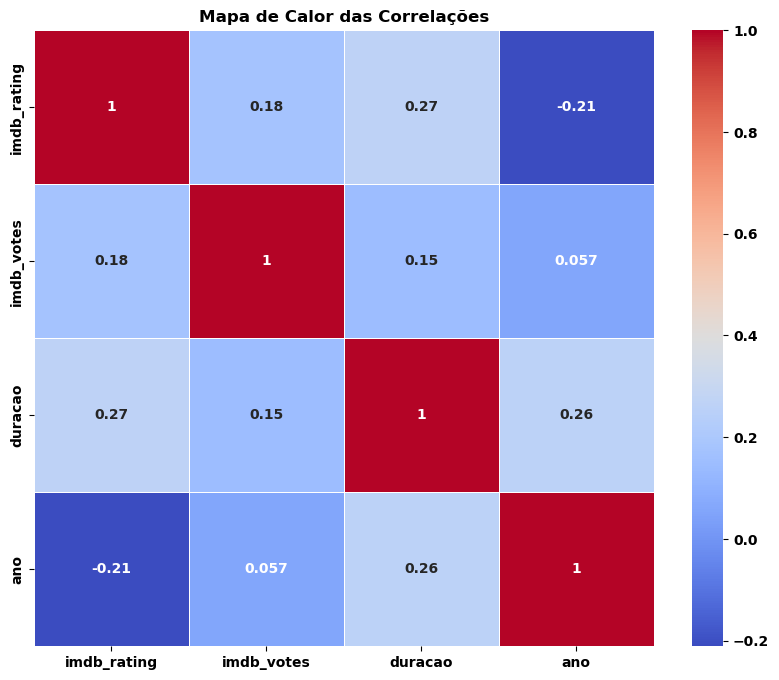

In [10]:
# Calculando a matriz de correla√ß√£o
correlacao = df[['imdb_rating', 'imdb_votes', 'duracao', 'ano']].corr()

# Criando um mapa de calor para visualizar as correla√ß√µes
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Mapa de Calor das Correla√ß√µes")
plt.show()

**Insights Gerais**:
- Os filmes que possuem uma quantidade maior de votos no IMDb tendem a ter classifica√ß√µes ligeiramente mais altas, o que pode indicar uma combina√ß√£o de popularidade e qualidade.
- H√° uma tend√™ncia leve, mas not√°vel, de filmes mais longos receberem classifica√ß√µes mais altas. Isso pode refletir uma prefer√™ncia por tramas mais detalhadas ou desenvolvidas.
- Filmes mais recentes t√™m uma ligeira tend√™ncia de receber classifica√ß√µes mais baixas. Pode ser interessante investigar se isso √© um reflexo de mudan√ßas nas expectativas do p√∫blico ou outras din√¢micas da ind√∫stria cinematogr√°fica.
- O aumento gradual na dura√ß√£o dos filmes ao longo do tempo pode ser reflexo de mudan√ßas nas conven√ß√µes cinematogr√°ficas, tecnologias de produ√ß√£o ou prefer√™ncias do p√∫blico.

Essas observa√ß√µes, embora baseadas em correla√ß√µes fraca a moderada, fornecem insights √∫teis sobre as tend√™ncias e rela√ß√µes nos dados. No entanto, √© importante lembrar que correla√ß√£o n√£o implica causalidade, e uma an√°lise mais aprofundada seria necess√°ria para fazer afirma√ß√µes definitivas.

## Classifica√ß√£o IMDb X Ano de lan√ßamento

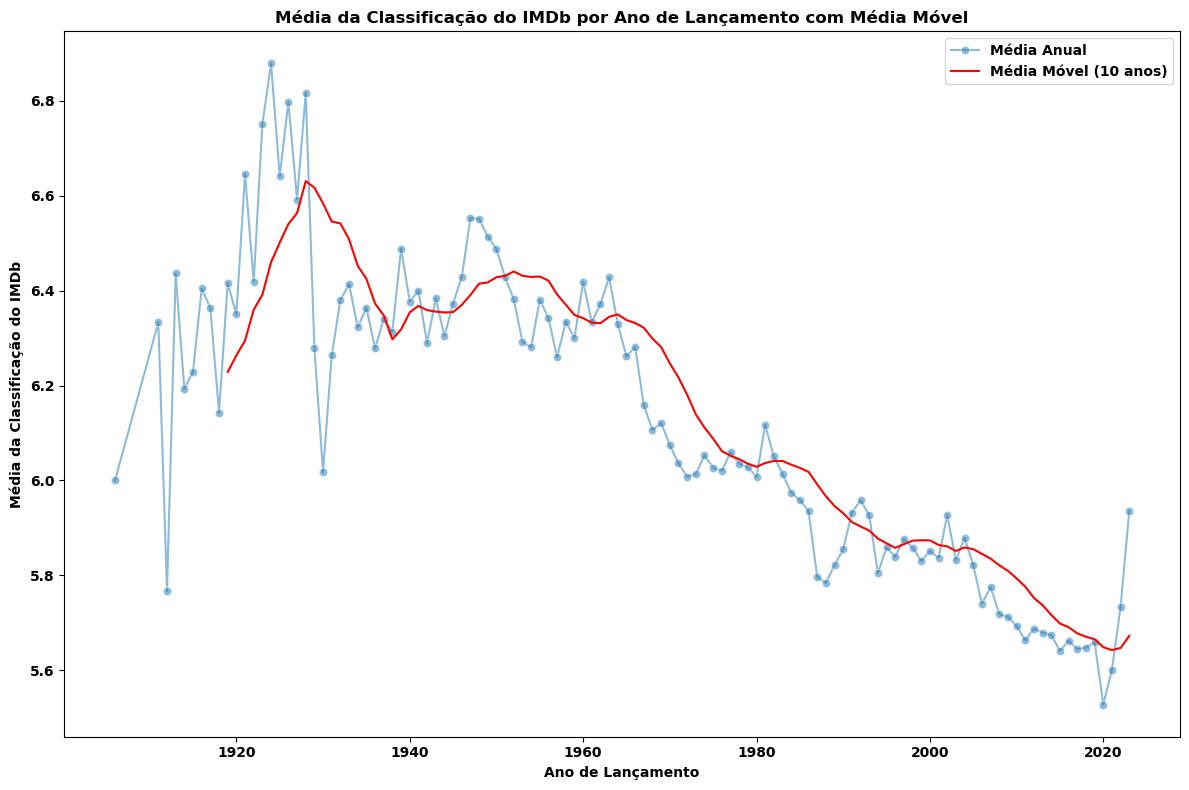

In [11]:
# Calculando a m√©dia da classifica√ß√£o do IMDb para cada ano de lan√ßamento
avg_rating_per_year = df.groupby('ano')['imdb_rating'].mean().reset_index()

# Aplicando uma m√©dia m√≥vel com uma janela de 10 anos para suavizar o gr√°fico
avg_rating_per_year['moving_avg'] = avg_rating_per_year['imdb_rating'].rolling(window=10).mean()

# Gr√°fico de linha com m√©dia m√≥vel
plt.figure(figsize=(12, 8))
sns.lineplot(x='ano', y='imdb_rating', data=avg_rating_per_year, label='M√©dia Anual', marker='o', alpha=0.5)
sns.lineplot(x='ano', y='moving_avg', data=avg_rating_per_year, label='M√©dia M√≥vel (10 anos)', color='red')
plt.title('M√©dia da Classifica√ß√£o do IMDb por Ano de Lan√ßamento com M√©dia M√≥vel')
plt.xlabel('Ano de Lan√ßamento')
plt.ylabel('M√©dia da Classifica√ß√£o do IMDb')
plt.legend()
plt.tight_layout()
plt.show()


**Insights Gerais**:

**Era de Ouro do Cinema**: Filmes lan√ßados antes de 1960 tendem a ter uma m√©dia de classifica√ß√£o mais alta. Isso pode refletir o "efeito de nostalgia", onde filmes mais antigos s√£o vistos como cl√°ssicos e, consequentemente, recebem classifica√ß√µes mais altas. Outra possibilidade √© que somente os melhores filmes daquela √©poca tenham perdurado e sejam mais amplamente reconhecidos, enquanto filmes menos memor√°veis tenham sido esquecidos.

**Decad√™ncia ap√≥s os anos 1960**: H√° um decl√≠nio percept√≠vel nas m√©dias das classifica√ß√µes a partir dos anos 1960. A democratiza√ß√£o do cinema e da cr√≠tica pode ter ampliado a diversidade de avalia√ß√µes, resultando em m√©dias mais baixas. Al√©m disso, o aumento na quantidade de filmes produzidos pode ter contribu√≠do para essa queda, com uma dilui√ß√£o da qualidade m√©dia.

**Ressurgimento Recente**: A m√©dia das classifica√ß√µes mostra uma ligeira recupera√ß√£o nos anos mais recentes (2021-2023). Isso pode ser o resultado de uma mudan√ßa nas avalia√ß√µes ou uma melhoria na qualidade dos filmes. A pandemia de COVID-19 tamb√©m pode ter desempenhado um papel, influenciando tanto a produ√ß√£o quanto a percep√ß√£o dos filmes durante esse per√≠odo.

**Flutua√ß√µes em Filmes Anteriores a 1960**: Filmes anteriores a 1960 apresentam flutua√ß√µes not√°veis nas m√©dias anuais. Devido ao menor n√∫mero de filmes desses anos presentes no conjunto de dados, as m√©dias s√£o mais sens√≠veis a avalia√ß√µes extremas, resultando em varia√ß√µes mais pronunciadas.

Estes insights proporcionam uma vis√£o abrangente das tend√™ncias nas avalia√ß√µes de filmes ao longo dos anos, destacando per√≠odos de destaque e mudan√ßas not√°veis na percep√ß√£o do p√∫blico.

## Dura√ß√£o x Ano de Lan√ßamento

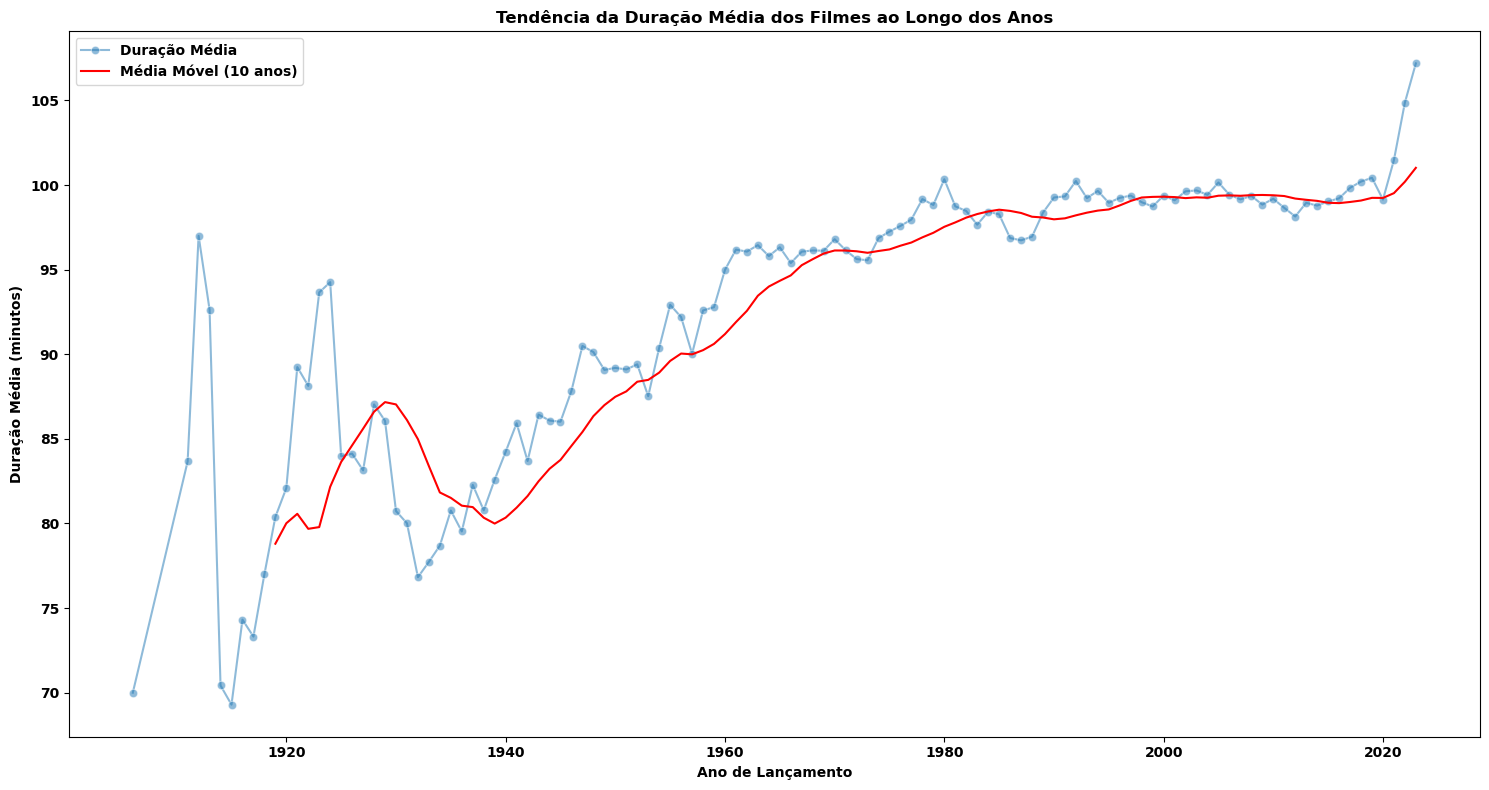

In [12]:
# Primeiro, vamos agrupar os dados por 'ano' e calcular a m√©dia da 'duracao'
df_grouped_by_year = df.groupby('ano')['duracao'].mean().reset_index()

# Adicionando a m√©dia m√≥vel ao gr√°fico para suavizar as flutua√ß√µes e facilitar a identifica√ß√£o de tend√™ncias
df_grouped_by_year['duracao_media_movel'] = df_grouped_by_year['duracao'].rolling(window=10).mean()

# Plotar o gr√°fico com a m√©dia m√≥vel
plt.figure(figsize=(15, 8))
sns.lineplot(x='ano', y='duracao', data=df_grouped_by_year, label='Dura√ß√£o M√©dia', marker='o', alpha=0.5)
sns.lineplot(x='ano', y='duracao_media_movel', data=df_grouped_by_year, label='M√©dia M√≥vel (10 anos)', color='red')
plt.title('Tend√™ncia da Dura√ß√£o M√©dia dos Filmes ao Longo dos Anos')
plt.xlabel('Ano de Lan√ßamento')
plt.ylabel('Dura√ß√£o M√©dia (minutos)')
plt.legend()
plt.tight_layout()
plt.show()

**Insights Gerais Sobre a Dura√ß√£o dos Filmes:**

**Era dos Filmes Curtos**: Nos prim√≥rdios do cinema, especialmente em torno de 1920, os filmes eram consideravelmente mais curtos, com uma m√©dia de dura√ß√£o de cerca de 52 minutos. Isso provavelmente reflete as limita√ß√µes tecnol√≥gicas e de produ√ß√£o da √©poca, restringindo a extens√£o dos filmes.

**Ascens√£o da Narrativa Cinematogr√°fica**: H√° um aumento progressivo na dura√ß√£o dos filmes do final dos anos 1920 at√© meados dos anos 1970, atingindo uma m√©dia de 100 minutos. Este fen√¥meno pode ser o resultado do amadurecimento da ind√∫stria cinematogr√°fica, com tramas mais complexas e produ√ß√µes mais ambiciosas exigindo mais tempo de tela.

**Norma da Ind√∫stria**: Ap√≥s o aumento sustentado, a dura√ß√£o m√©dia dos filmes estabiliza-se, oscilando levemente em torno de 100 minutos por v√°rias d√©cadas at√© os anos 2020. Isso indica a consolida√ß√£o de uma norma industrial quanto ao tempo de dura√ß√£o "ideal" de um filme, equilibrando a necessidade de desenvolvimento narrativo com as prefer√™ncias do p√∫blico.

**Era de Experi√™ncias Cinematogr√°ficas Expansivas**: A partir de 2021, nota-se um aumento na dura√ß√£o m√©dia dos filmes, sugerindo uma mudan√ßa nas prefer√™ncias tanto dos criadores quanto dos espectadores. Inicialmente impulsionado pelo contexto da pandemia, que pode ter favorecido conte√∫dos mais longos para p√∫blicos confinados, este aumento na dura√ß√£o dos filmes parece se sustentar al√©m desse per√≠odo. Isso pode refletir um interesse crescente em experi√™ncias cinematogr√°ficas mais imersivas e detalhadas.

**A "Dura√ß√£o Ideal"**: Em m√©dia, ao longo dos anos, os filmes tendem a durar cerca de 102 minutos. Esta "dura√ß√£o ideal" ressoa com a expectativa do p√∫blico e se adapta a uma ampla variedade de g√™neros e narrativas, demonstrando que, independentemente das tend√™ncias temporais, existe uma prefer√™ncia consistente que molda a produ√ß√£o cinematogr√°fica.

## G√™neros prim√°rios x Classifica√ß√£o do IMDb

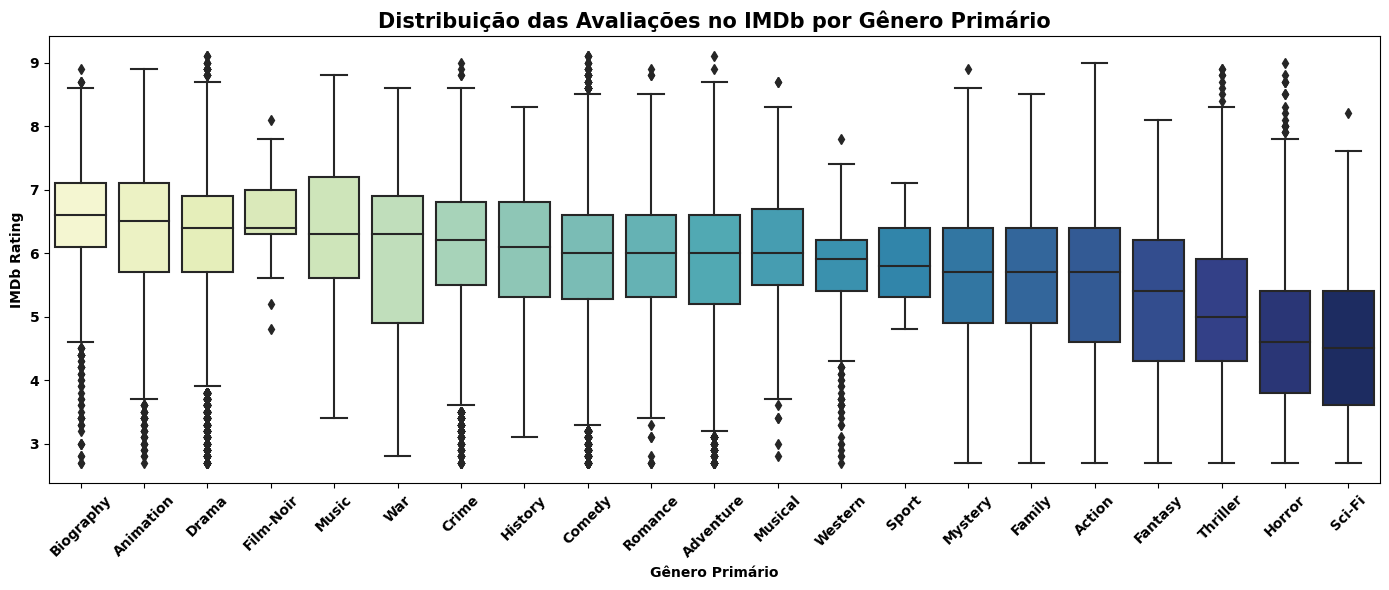

In [13]:
# Calculando a mediana das avalia√ß√µes para cada g√™nero
median_colors = df.groupby('genero_primario')['imdb_rating'].median().sort_values(ascending=False)

# Criando um mapa de cores baseado nas medianas
color_palette = sns.color_palette("YlGnBu", n_colors=len(median_colors))
color_map = dict(zip(median_colors.index, color_palette))

# Plotando o boxplot com as cores ajustadas
plt.figure(figsize=(14, 6))
sns.boxplot(x="genero_primario", y="imdb_rating", data=df, palette=color_map, order=median_colors.index)

# Configurando o gr√°fico
plt.title("Distribui√ß√£o das Avalia√ß√µes no IMDb por G√™nero Prim√°rio", fontsize=15)
plt.xlabel("G√™nero Prim√°rio")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**G√™neros Mais Altamente Avaliados**:
- **Biografia**: Com uma mediana de 6.6, o g√™nero biografia se destaca como o mais bem avaliado, refletindo a aprecia√ß√£o do p√∫blico por hist√≥rias baseadas em eventos e personalidades reais.
- **Anima√ß√£o**: Com uma mediana de 6.5, este g√™nero demonstra uma forte prefer√™ncia, especialmente considerando que anima√ß√µes muitas vezes atraem p√∫blicos de todas as idades.
- **Drama**: Consistindo no maior n√∫mero de filmes, o g√™nero drama tem uma mediana de 6.4, o que √© um testemunho de sua popularidade e aceita√ß√£o ampla pelo p√∫blico.

**G√™neros Menos Favorecidos**:
- **Terror**: Apesar de ser um g√™nero popular com um grande n√∫mero de filmes, o terror tem uma mediana de 4.6, indicando que o p√∫blico deste g√™nero √© bastante quanto √† qualidade do filme.
- **Sci-Fi**: Com uma mediana de 4.5, o g√™nero de fic√ß√£o cient√≠fica, embora possa ter um seguimento cult, tem uma m√©dia de classifica√ß√£o relativamente baixa.
  
**Intervalo de Varia√ß√µes Dentro dos G√™neros**:
A varia√ß√£o dentro dos g√™neros, como indicado pelos quartis, mostra que enquanto alguns g√™neros t√™m avalia√ß√µes consistentemente altas ou baixas, outros, como **Guerra** e **A√ß√£o**, t√™m uma ampla gama de avalia√ß√µes, como indicado pelo tamanho do box plot. Isso indica que a qualidade dos filmes desses g√™neros s√£o mais suscet√≠veis a serem influenciadas por outros fatores do que, por exemplo, o g√™nero **Biografia** que, apesar de ter avalia√ß√µes diversificadas, tem notas consistentemente mais altas e dentro de um intervalo menor.

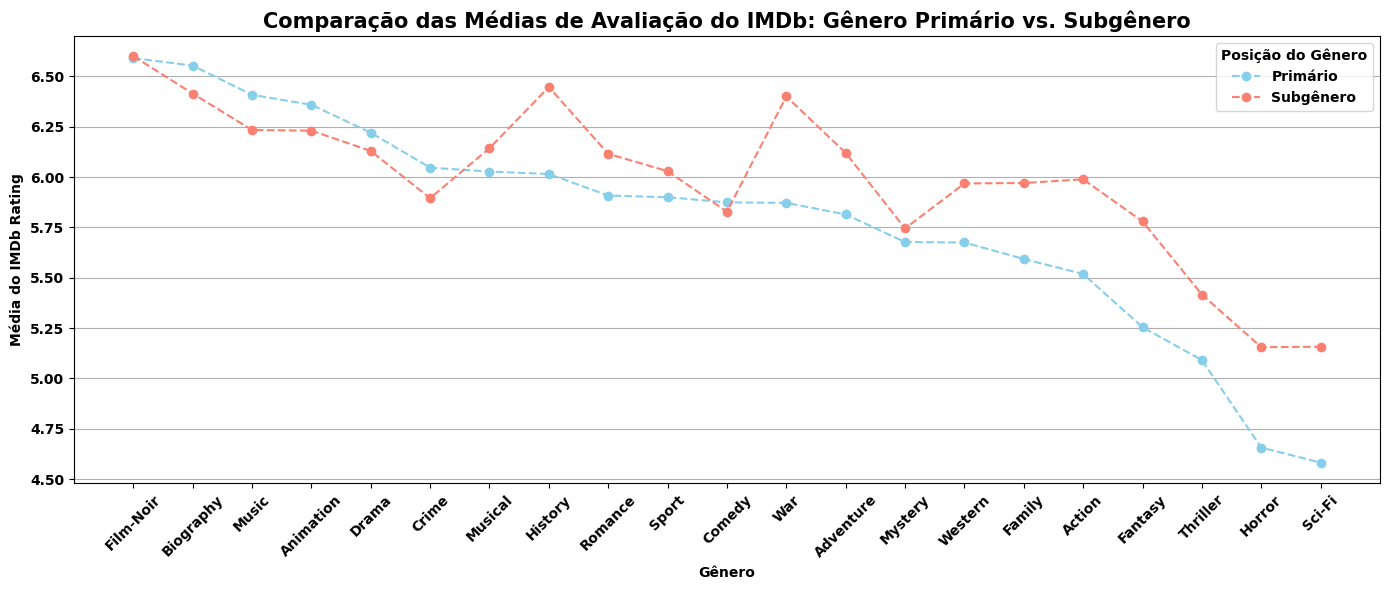

In [14]:
# Criando um DataFrame para armazenar as m√©dias das avalia√ß√µes para cada g√™nero quando ele √© prim√°rio e subg√™nero
genre_comparison = pd.DataFrame(index=df['genero_primario'].unique())

# Calculando as m√©dias das avalia√ß√µes para cada g√™nero como prim√°rio
genre_comparison['primary'] = df.groupby('genero_primario')['imdb_rating'].mean()

# Calculando as m√©dias das avalia√ß√µes para cada g√™nero como secund√°rio e terci√°rio
genre_comparison['subgenre'] = (df.groupby('genero_secundario')['imdb_rating'].mean() +
                                df.groupby('genero_terciario')['imdb_rating'].mean()) / 2

# Removendo NaNs (caso algum g√™nero n√£o apare√ßa como subg√™nero)
genre_comparison = genre_comparison.dropna()

# Ordenando os valores para a visualiza√ß√£o
genre_comparison = genre_comparison.sort_values(by='primary', ascending=False)

# Criando um gr√°fico de linhas para comparar as m√©dias das avalia√ß√µes dos g√™neros como prim√°rios e subg√™neros
plt.figure(figsize=(14, 6))
plt.plot(genre_comparison.index, genre_comparison['primary'], marker='o', label='Prim√°rio', color='skyblue', linestyle='dashed')
plt.plot(genre_comparison.index, genre_comparison['subgenre'], marker='o', label='Subg√™nero', color='salmon', linestyle='dashed')

# Configurando o gr√°fico
plt.title('Compara√ß√£o das M√©dias de Avalia√ß√£o do IMDb: G√™nero Prim√°rio vs. Subg√™nero', fontsize=15)
plt.ylabel('M√©dia do IMDb Rating')
plt.xlabel('G√™nero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Posi√ß√£o do G√™nero')
plt.grid(axis='y')

# Exibindo o gr√°fico
plt.show()


**Insights Gerais**

**Realce atrav√©s do Subg√™nero**: De modo geral, um g√™nero frequentemente obt√©m avalia√ß√µes mais altas quando √© integrado como subg√™nero. Isso sugere que a introdu√ß√£o de determinados temas ou estilos cinematogr√°ficos como elementos complementares pode real√ßar a narrativa principal, tornando-a mais envolvente para o p√∫blico.

**O Poder da Combina√ß√£o**: G√™neros como **Hist√≥ria**, **Guerra**, **A√ß√£o** e **Aventura** exemplificam essa tend√™ncia. Quando posicionados como g√™neros principais, podem n√£o ter o mesmo impacto no p√∫blico. No entanto, ao serem introduzidos como subg√™neros, enriquecendo a narrativa principal de outro g√™nero, a rea√ß√£o do p√∫blico tende a ser mais favor√°vel.

**Exce√ß√µes Not√°veis**: Contudo, h√° g√™neros que desafiam essa tend√™ncia geral. **Musical**, **Drama** e **Crime**, por exemplo, tendem a ser mais bem avaliados quando s√£o o g√™nero principal do filme. Isso destaca sua for√ßa intr√≠nseca e a capacidade de se manterem como pilares narrativos centrais, sem a necessidade de serem complementados por outros g√™neros.

**A Arte da Narrativa Cinematogr√°fica**: Esses padr√µes sublinham a versatilidade e a complexidade da narrativa cinematogr√°fica. A habilidade de mesclar e harmonizar g√™neros pode criar experi√™ncias mais imersivas, enquanto certos g√™neros ret√™m sua for√ßa e apelo, independentemente de sua posi√ß√£o na estrutura da hist√≥ria.

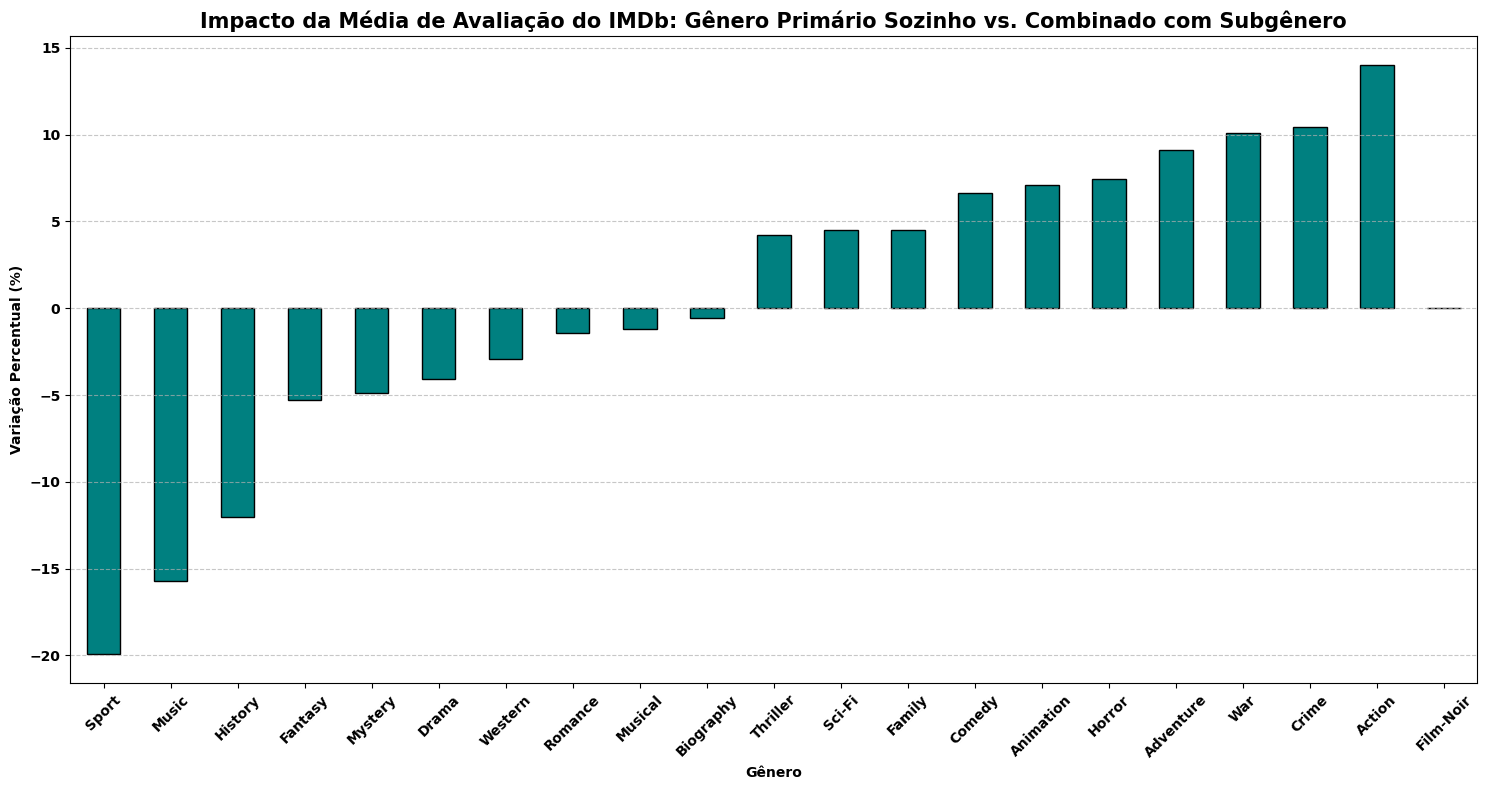

In [20]:
# Calculando a m√©dia de avalia√ß√£o para cada g√™nero prim√°rio quando ele aparece sozinho
solo_genre_df = df[df['genero_secundario'].isna() & df['genero_terciario'].isna()]
solo_primary_avg = solo_genre_df.groupby('genero_primario')['imdb_rating'].mean()

# Calculando a m√©dia de avalia√ß√£o para cada g√™nero prim√°rio quando combinado com qualquer subg√™nero
combined_genre_df = df.dropna(subset=['genero_secundario', 'genero_terciario'], how='all')
combined_primary_avg = combined_genre_df.groupby('genero_primario')['imdb_rating'].mean()

# Calculando a varia√ß√£o percentual
percentage_variation = ((combined_primary_avg - solo_primary_avg) / solo_primary_avg) * 100

# Configura√ß√£o do gr√°fico
plt.figure(figsize=(15, 8))
percentage_variation.sort_values().plot(kind='bar', color='teal', edgecolor='black')

# Configura√ß√µes adicionais do gr√°fico
plt.title('Impacto da M√©dia de Avalia√ß√£o do IMDb: G√™nero Prim√°rio Sozinho vs. Combinado com Subg√™nero', fontsize=15)
plt.ylabel('Varia√ß√£o Percentual (%)')
plt.xlabel('G√™nero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gr√°fico
plt.show()

**Interpreta√ß√£o de G√™neros Tradicionalmente "Puros"**: G√™neros como "Esporte", "Music" e "Hist√≥ria" t√™m uma queda significativa em suas avalia√ß√µes quando combinados com outros subg√™neros. Isso pode sugerir que o p√∫blico prefere uma abordagem mais "pura" ou tradicional para esses tipos de filmes. Por exemplo, os espectadores podem preferir filmes esportivos que se concentram estritamente em esportes, sem a introdu√ß√£o de elementos de outros g√™neros.

**Versatilidade de G√™neros Populares**: G√™neros como "A√ß√£o", "Crime" e "Guerra" experimentam um aumento nas avalia√ß√µes quando combinados com outros g√™neros. Isso indica que a inclus√£o de elementos de outros g√™neros pode enriquecer a narrativa ou tornar o filme mais din√¢mico e interessante para o p√∫blico. Por exemplo, um filme de a√ß√£o com elementos de mist√©rio ou romance pode ser mais envolvente do que um filme de a√ß√£o puro.

**Neutralidade de Certos G√™neros**: G√™neros como "Biografia", "Romance" e "Musical" mostram varia√ß√µes m√≠nimas, sugerindo que a combina√ß√£o com outros subg√™neros n√£o tem um impacto significativo nas avalia√ß√µes. Isso pode indicar que a ess√™ncia desses g√™neros permanece intacta, independentemente da introdu√ß√£o de elementos de outros g√™neros.

**Implica√ß√µes para Produtores e Diretores**: Ao decidir o g√™nero e a narrativa de um filme, os cineastas podem considerar essas tend√™ncias. Se estiverem produzindo um filme esportivo, por exemplo, pode ser ben√©fico manter-se fiel ao g√™nero. Por outro lado, se estiverem se aventurando em um filme de a√ß√£o, a introdu√ß√£o de subg√™neros pode ser uma boa estrat√©gia.

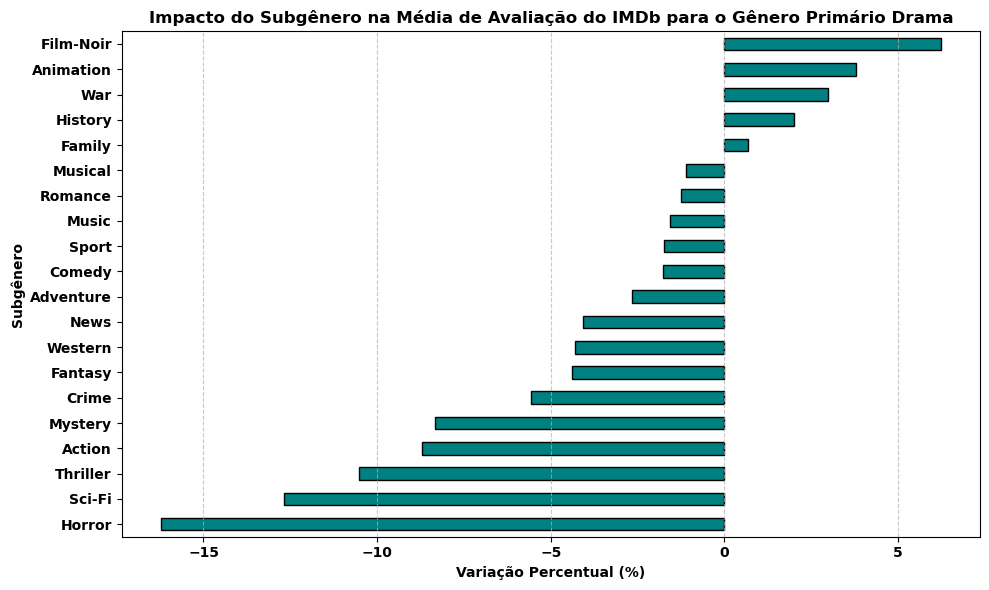

In [11]:
def analyze_genre(primary_genre):
    """
    Esta fun√ß√£o recebe um g√™nero prim√°rio e retorna a varia√ß√£o percentual 
    que cada subg√™nero (considerando secund√°rio e terci√°rio) pode causar 
    na m√©dia de avalia√ß√£o do IMDb para o g√™nero prim√°rio inserido.
    """
    # Calculando a m√©dia de avalia√ß√£o para o g√™nero prim√°rio quando ele aparece sozinho
    solo_genre_df = df[df['genero_secundario'].isna() & df['genero_terciario'].isna()]
    solo_primary_avg = solo_genre_df.groupby('genero_primario')['imdb_rating'].mean().get(primary_genre, None)
    
    # Obtendo as avalia√ß√µes para o g√™nero prim√°rio quando combinado com subg√™neros
    combined_genre_df = df[df['genero_primario'] == primary_genre]
    
    # Extraindo subg√™neros e avalia√ß√µes em uma lista
    subgenres = combined_genre_df['genero_secundario'].tolist() + combined_genre_df['genero_terciario'].tolist()
    ratings = combined_genre_df['imdb_rating'].tolist() + combined_genre_df['imdb_rating'].tolist()

    # Criando um DataFrame com subg√™neros e avalia√ß√µes
    combined_df = pd.DataFrame({'subgenero': subgenres, 'imdb_rating': ratings}).dropna()
    
    # Calculando a m√©dia de avalia√ß√£o para cada subg√™nero
    subgenre_avg = combined_df.groupby('subgenero')['imdb_rating'].mean()
    
    # Calculando a varia√ß√£o percentual para cada subg√™nero
    if solo_primary_avg:
        percentage_variation = ((subgenre_avg - solo_primary_avg) / solo_primary_avg) * 100
    else:
        percentage_variation = None
    
    results = pd.DataFrame({'subgenero': subgenre_avg.index, 'percentage_variation': percentage_variation.values})
    
    return results

def visualize_genre(primary_genre):
    results = analyze_genre(primary_genre)
    
    # Configura√ß√£o do gr√°fico
    plt.figure(figsize=(10, 6))
    results.sort_values('percentage_variation').set_index('subgenero')['percentage_variation'].plot(kind='barh', color='teal', edgecolor='black')

    # Configura√ß√µes adicionais do gr√°fico
    plt.title(f'Impacto do Subg√™nero na M√©dia de Avalia√ß√£o do IMDb para o G√™nero Prim√°rio {primary_genre}')
    plt.xlabel('Varia√ß√£o Percentual (%)')
    plt.ylabel('Subg√™nero')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Exibindo o gr√°fico
    plt.show()

# Executando a fun√ß√£o
visualize_genre("Drama")

**Ferramenta de Decis√£o para Cineastas**: O script √© extremamente √∫til para cineastas que desejam entender o impacto de combinar diferentes subg√™neros com um g√™nero prim√°rio. Ao visualizar a varia√ß√£o percentual, os cineastas podem tomar decis√µes informadas sobre quais subg√™neros introduzir em um filme para potencialmente aumentar sua popularidade e avalia√ß√£o.

**Evitando Combina√ß√µes Desfavor√°veis**: Da mesma forma, ao identificar subg√™neros que podem diminuir a avalia√ß√£o m√©dia, os cineastas podem optar por evitar certas combina√ß√µes ou abordar a narrativa de uma maneira que neutralize poss√≠veis rejei√ß√µes.

**Flexibilidade e Customiza√ß√£o**: O script oferece flexibilidade, pois permite que os usu√°rios escolham qualquer g√™nero prim√°rio e visualizem o impacto dos subg√™neros. Isso √© valioso porque os cineastas podem adaptar sua abordagem com base no g√™nero espec√≠fico de filme que est√£o produzindo.

# G√™neros prim√°rios x Ano de lan√ßamento

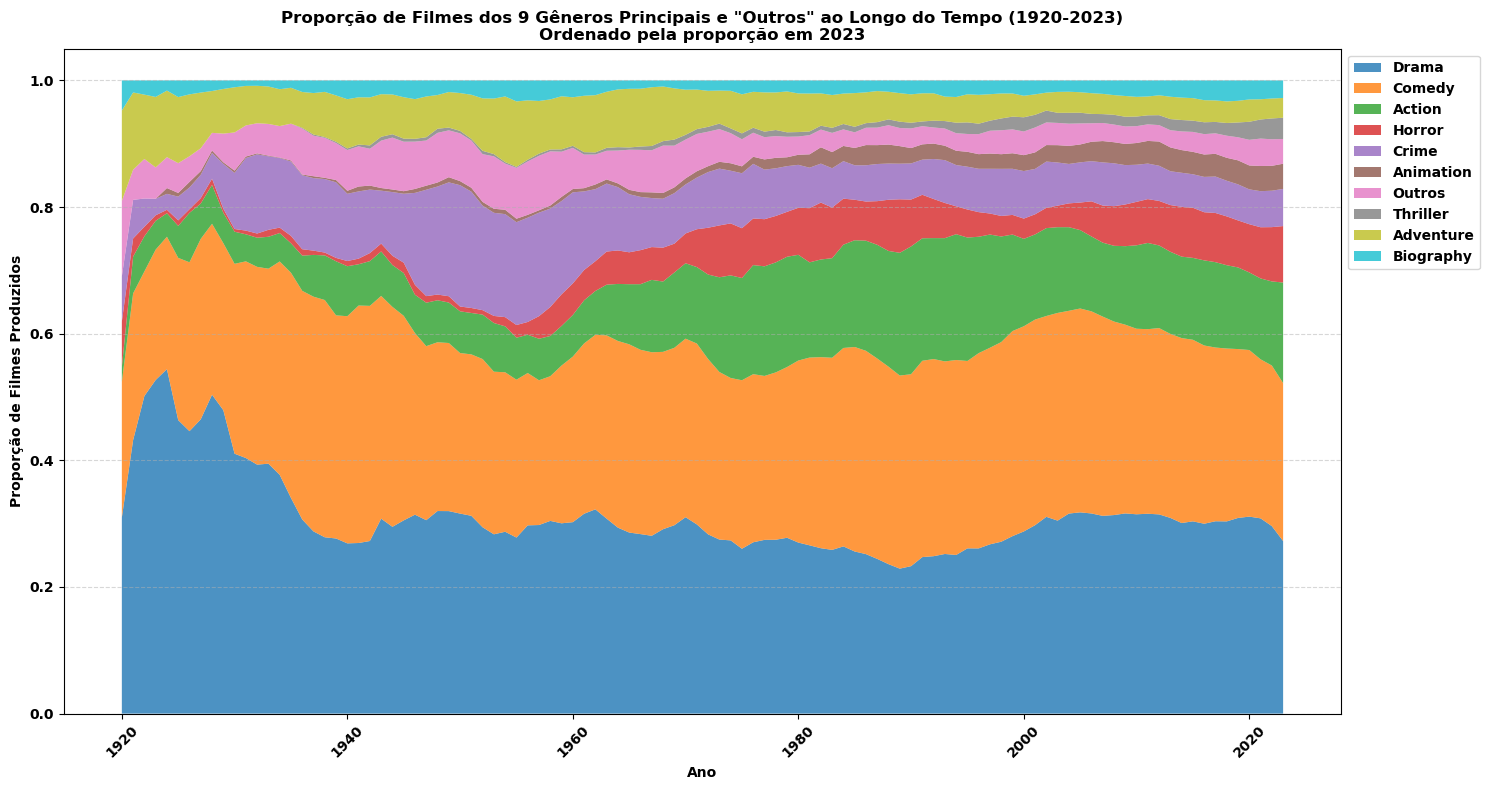

In [31]:
# Filtrando os dados para incluir apenas anos a partir de 1920
df = df[df['ano'] >= 1920]

# Identificando os 9 g√™neros mais comuns
generos_mais_comuns_9 = df['genero_primario'].value_counts().head(9).index

# Criando uma nova coluna que cont√©m o nome do g√™nero se ele estiver entre os 9 mais frequentes, e "Outros" caso contr√°rio
df['genero_agrupado'] = df['genero_primario'].where(df['genero_primario'].isin(generos_mais_comuns_9), 'Outros')

# Agrupando os dados por ano e g√™nero agrupado e contando o n√∫mero de filmes
filmes_por_genero_ano_agrupados = df.groupby(['ano', 'genero_agrupado']).size().unstack(fill_value=0)

# Calculando a propor√ß√£o de filmes de cada g√™nero em rela√ß√£o ao total em cada ano
proporcao_filmes_genero_agrupados = filmes_por_genero_ano_agrupados.div(filmes_por_genero_ano_agrupados.sum(axis=1), axis=0)

# Aplicando a suaviza√ß√£o exponencial para suavizar as linhas
proporcao_filmes_genero_suavizada_exp = proporcao_filmes_genero_agrupados.ewm(span=5).mean()

# Verificando o ano mais recente nos dados
ano_mais_recente = df['ano'].max()

# Reordenando as colunas pela propor√ß√£o dos g√™neros no ano mais recente com dados
colunas_ordenadas = proporcao_filmes_genero_suavizada_exp.loc[ano_mais_recente].sort_values(ascending=False).index

# Definindo uma paleta de cores
paleta_cores = sns.color_palette("tab10", n_colors=10)  # Agora temos 10 cores, pois inclu√≠mos a categoria "Outros"

# Criando um gr√°fico de √°rea empilhada para visualizar a propor√ß√£o dos g√™neros ao longo do tempo
plt.figure(figsize=(15, 8))
plt.stackplot(proporcao_filmes_genero_suavizada_exp.index, 
              proporcao_filmes_genero_suavizada_exp[colunas_ordenadas].T, 
              labels=colunas_ordenadas, 
              colors=paleta_cores, 
              alpha=0.8)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f'Propor√ß√£o de Filmes dos 9 G√™neros Principais e "Outros" ao Longo do Tempo (1920-{ano_mais_recente})\nOrdenado pela propor√ß√£o em {ano_mais_recente}')
plt.xlabel('Ano')
plt.ylabel('Propor√ß√£o de Filmes Produzidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.show()


C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


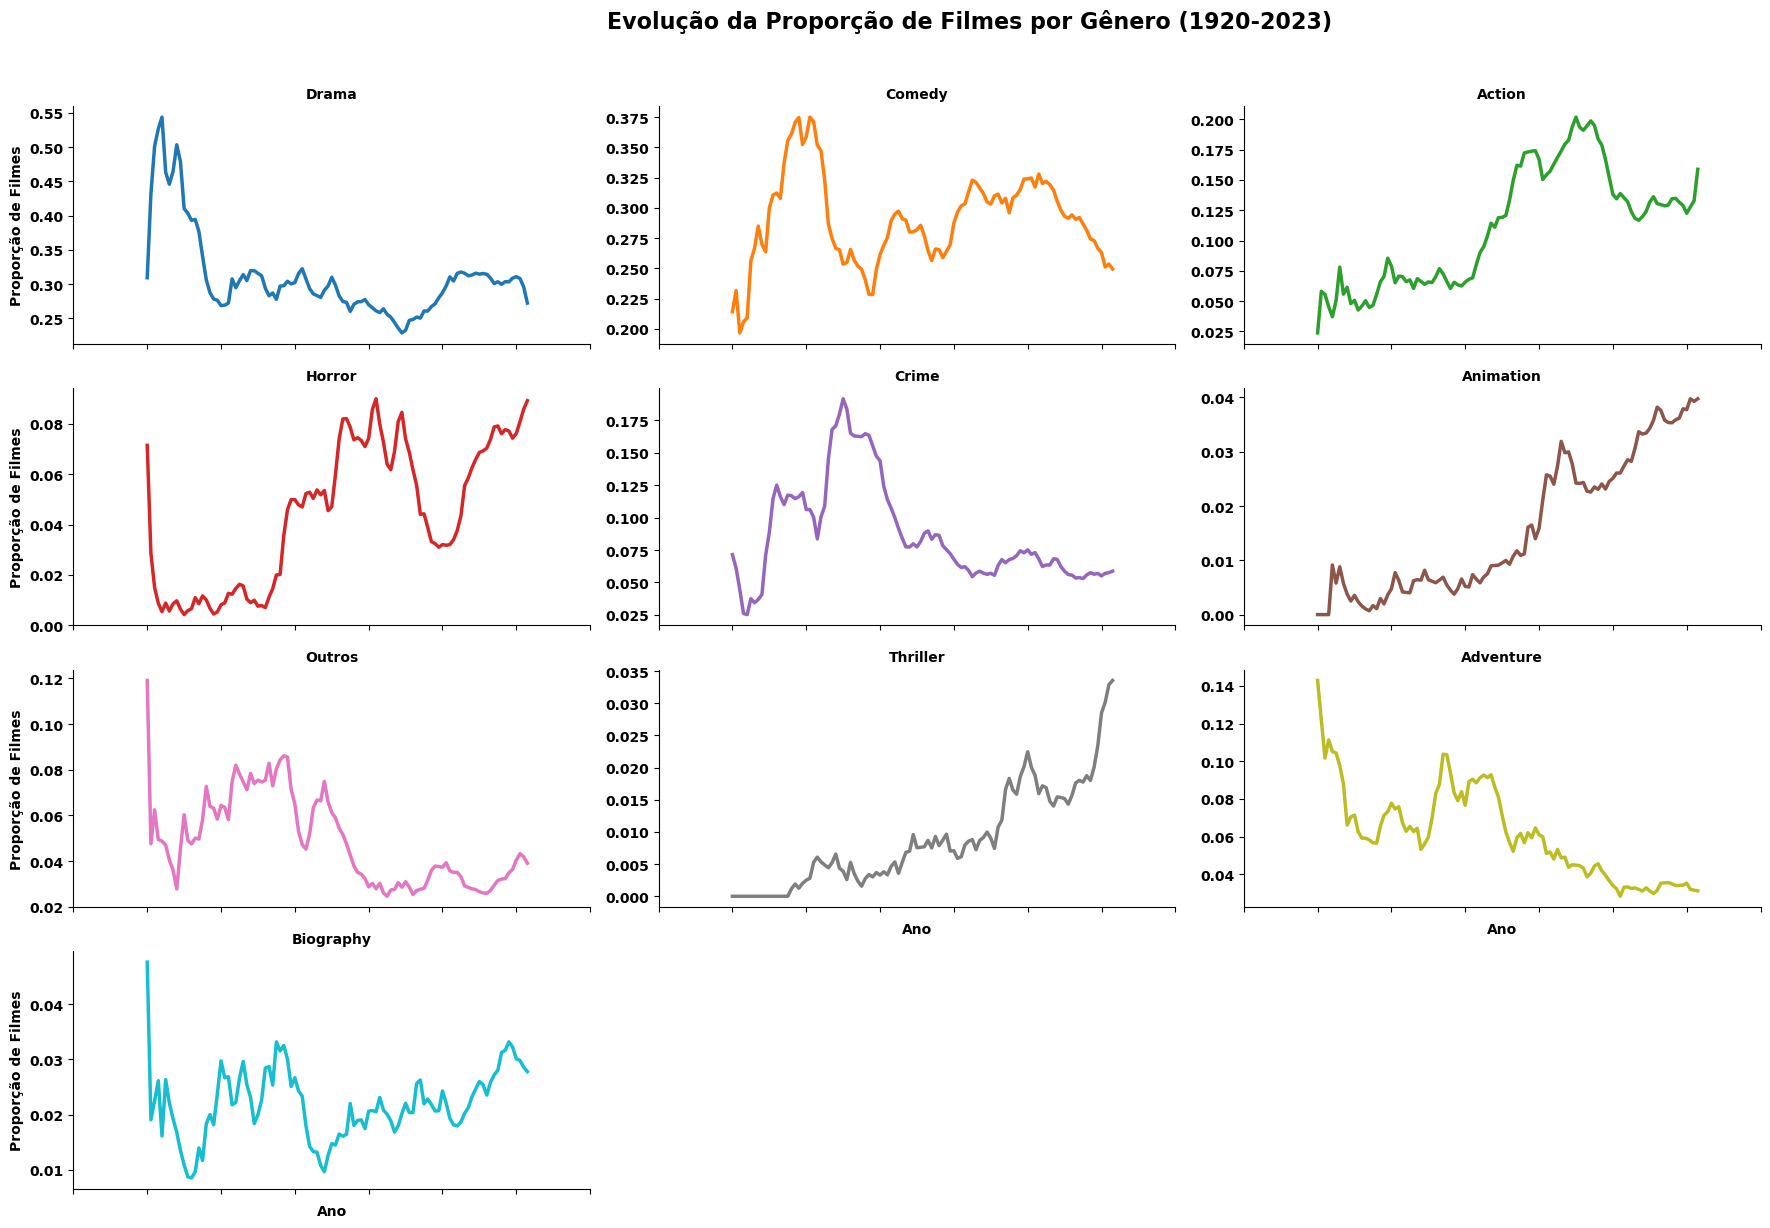

In [32]:
# Mapeando cada g√™nero para uma cor espec√≠fica com base na ordem fornecida
ordem_generos = ['Drama', 'Comedy', 'Action', 'Horror', 'Crime', 'Animation', 'Outros', 'Thriller', 'Adventure', 'Biography']
mapeamento_cores = dict(zip(ordem_generos, paleta_cores))

# Plotando a an√°lise temporal facetada com a ordem dos g√™neros ajustada
g = sns.relplot(data=proporcao_filmes_genero_suavizada_exp.reset_index().melt(id_vars='ano', value_name='proporcao'), 
                x='ano', y='proporcao', hue='genero_agrupado', palette=mapeamento_cores, kind='line',
                col='genero_agrupado', col_wrap=3, height=3, aspect=2, linewidth=2.5, facet_kws=dict(sharey=False),
                col_order=colunas_ordenadas)  # Utilizando a ordem dos g√™neros especificada

# Ajustando os t√≠tulos e labels
g.fig.suptitle('Evolu√ß√£o da Propor√ß√£o de Filmes por G√™nero (1920-2023)', size=16, y=1.02)
g.set_titles("{col_name}")
g.set_axis_labels("Ano", "Propor√ß√£o de Filmes")
g.set_xticklabels(rotation=45)
g.tight_layout()

# Removendo a legenda, pois o nome do g√™nero j√° est√° no t√≠tulo de cada subgr√°fico
g._legend.remove()

# Exibir o gr√°fico
plt.show()

# Subg√™neros x Ano de lan√ßamento

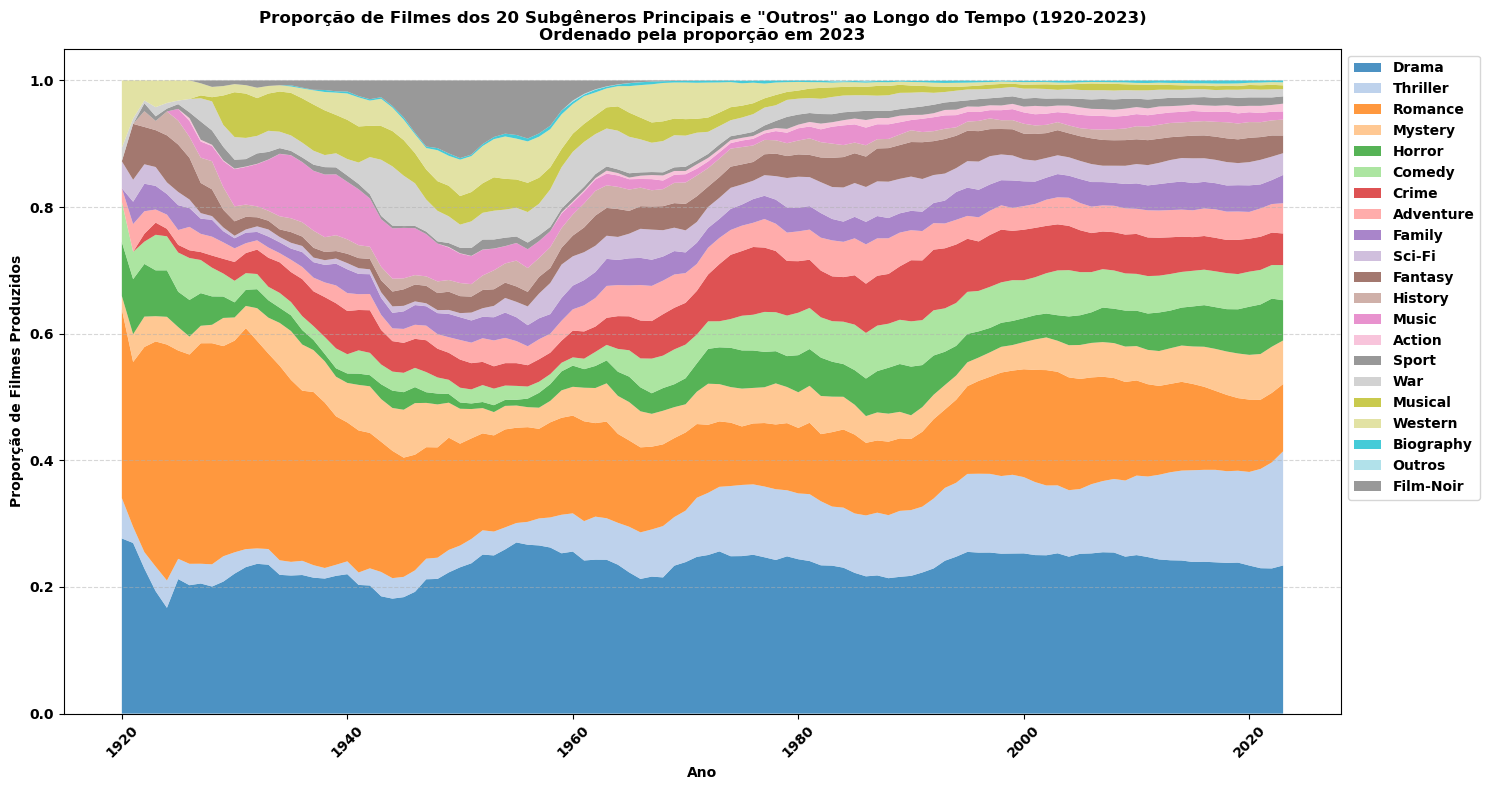

In [17]:
# Criando um DataFrame que considera m√∫ltiplos subg√™neros sem duplicatas
subgeneros_expandidos = df[['ano', 'genero_secundario', 'genero_terciario']].melt(id_vars='ano', value_name='subgenero').dropna().drop(columns='variable')

# Identificando os 20 subg√™neros mais comuns
top_20_subgeneros = subgeneros_expandidos['subgenero'].value_counts().head(20).index

# Criando uma nova coluna que cont√©m o nome do subg√™nero se ele estiver entre os 20 mais frequentes, e "Outros" caso contr√°rio
subgeneros_expandidos['subgenero_agrupado'] = subgeneros_expandidos['subgenero'].where(subgeneros_expandidos['subgenero'].isin(top_20_subgeneros), 'Outros')

# Agrupando os dados por ano e subg√™nero agrupado e contando o n√∫mero de filmes
filmes_por_subgenero_ano_agrupados = subgeneros_expandidos.groupby(['ano', 'subgenero_agrupado']).size().unstack(fill_value=0)

# Calculando a propor√ß√£o de filmes de cada subg√™nero em rela√ß√£o ao total em cada ano
proporcao_filmes_subgenero_agrupados = filmes_por_subgenero_ano_agrupados.div(filmes_por_subgenero_ano_agrupados.sum(axis=1), axis=0)

# Aplicando a suaviza√ß√£o exponencial para suavizar as linhas
proporcao_filmes_subgenero_suavizada_exp = proporcao_filmes_subgenero_agrupados.ewm(span=5).mean()

# Verificando o ano mais recente nos dados
ano_mais_recente_subgenero = subgeneros_expandidos['ano'].max()

# Reordenando as colunas pela propor√ß√£o dos subg√™neros no ano mais recente com dados
colunas_ordenadas_subgenero = proporcao_filmes_subgenero_suavizada_exp.loc[ano_mais_recente_subgenero].sort_values(ascending=False).index

# Definindo uma paleta de cores
paleta_cores_subgeneros = sns.color_palette("tab20", n_colors=20)  # 20 cores para os subg√™neros mais comuns
paleta_cores_subgeneros.append("#808080")  # Adicionando cinza para a categoria "Outros"

# Criando um gr√°fico de √°rea empilhada para visualizar a propor√ß√£o dos subg√™neros ao longo do tempo
plt.figure(figsize=(15, 8))
plt.stackplot(proporcao_filmes_subgenero_suavizada_exp.index, 
              proporcao_filmes_subgenero_suavizada_exp[colunas_ordenadas_subgenero].T, 
              labels=colunas_ordenadas_subgenero, 
              colors=paleta_cores_subgeneros, 
              alpha=0.8)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f'Propor√ß√£o de Filmes dos 20 Subg√™neros Principais e "Outros" ao Longo do Tempo (1920-{ano_mais_recente_subgenero})\nOrdenado pela propor√ß√£o em {ano_mais_recente_subgenero}')
plt.xlabel('Ano')
plt.ylabel('Propor√ß√£o de Filmes Produzidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.show()

C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


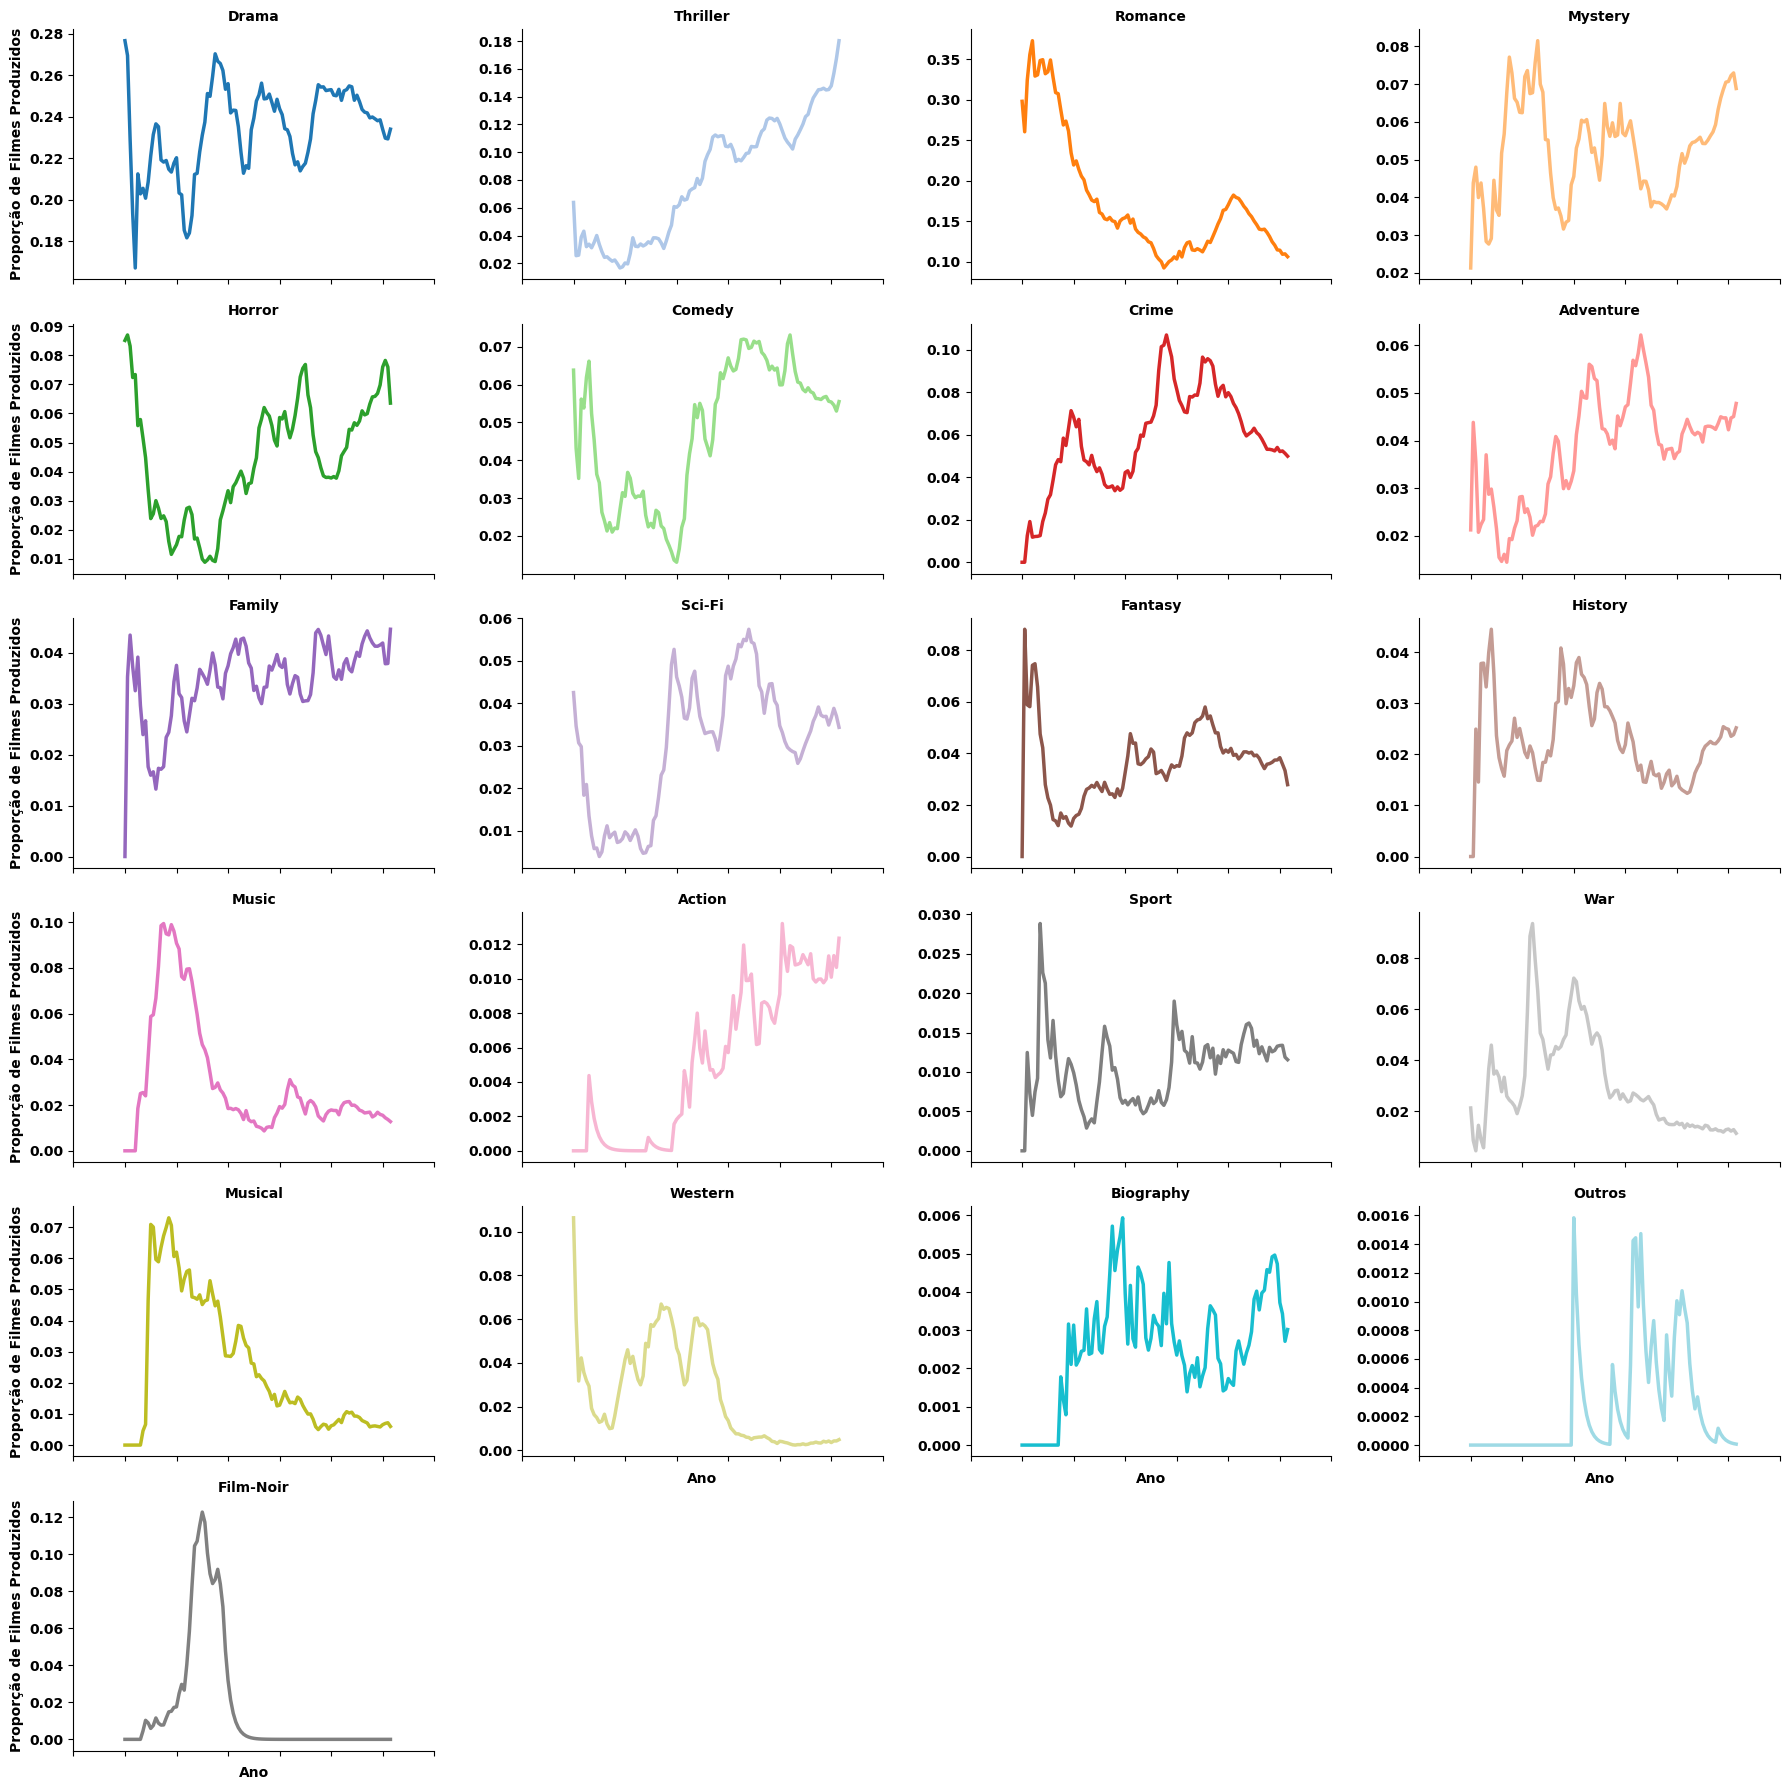

In [22]:
# Mapeando cada subg√™nero para uma cor espec√≠fica com base na paleta fornecida
mapeamento_cores_subgeneros = dict(zip(colunas_ordenadas_subgenero, paleta_cores_subgeneros))

# Criando gr√°ficos facetados para cada subg√™nero com cores corrigidas e sem legenda
g = sns.relplot(
    data=proporcao_filmes_subgenero_suavizada_exp.reset_index().melt(id_vars='ano', value_name='proporcao', var_name='subgenero'),
    x='ano', y='proporcao', hue='subgenero', col='subgenero', col_order=colunas_ordenadas_subgenero,
    kind='line', col_wrap=4, facet_kws=dict(sharey=False), palette=mapeamento_cores_subgeneros,
    linewidth=2.5, aspect=1.5, height=3, legend=False
)

# Ajustando os t√≠tulos e labels dos eixos
g.set_titles("{col_name}")
g.set_axis_labels("Ano", "Propor√ß√£o de Filmes Produzidos")
g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()



**Preval√™ncia de Drama**: A an√°lise mostra que o g√™nero Drama mant√©m uma presen√ßa dominante ao longo dos anos, tanto como g√™nero prim√°rio quanto subg√™nero. Esta observa√ß√£o indica uma prefer√™ncia cont√≠nua por narrativas dram√°ticas, talvez devido √† sua capacidade universal de resson√¢ncia com experi√™ncias humanas mais profundas.

**Evolu√ß√£o dos G√™neros Prim√°rios**: H√° um aumento not√°vel na produ√ß√£o de filmes de "Anima√ß√£o", que pode ser correlacionado com avan√ßos tecnol√≥gicos e a alta aceita√ß√£o do p√∫blico para esse g√™nero. G√™neros como "A√ß√£o" e "Thriller" tamb√©m mostram um crescimento, o que pode ser interpretado como uma prefer√™ncia por tramas mais intensas e din√¢micas.

**Evolu√ß√£o dos Subg√™neros**: O subg√™nero "Thriller" apresenta um crescimento expressivo, passando de 4% para 18% em propor√ß√£o nos √∫ltimos 100 anos. Isso pode refletir um interesse crescente por tramas complexas e tensas. J√° o subg√™nero "Mist√©rio" mostra uma curva em forma de "U", sugerindo uma ressurg√™ncia ap√≥s um per√≠odo de decl√≠nio, possivelmente devido a um renovado interesse em enigmas e mist√©rios. Vale ressaltar que os dois subg√™neros se complementam muito bem, o que comprova que essa popularidade observada √© verdadeira.

**Tend√™ncias de baixa**: Alguns g√™neros prim√°rios, como "Aventura" e "Crime", demonstram uma queda na sua propor√ß√£o ao longo dos anos. Isso pode ser um indicativo de satura√ß√£o da ind√∫stria ou mudan√ßas nas prefer√™ncias do p√∫blico. Entre os subg√™neros, "Romance", "Music", "Musical" e "Guerra" mostram uma tend√™ncia de baixa, possivelmente refletindo uma procura por narrativas mais contempor√¢neas e menos idealizadas.

**Planejamento de Produ√ß√£o**: Essas observa√ß√µes s√£o valiosas para produtores e est√∫dios na tomada de decis√µes estrat√©gicas. A an√°lise das tend√™ncias pode orientar investimentos em g√™neros em ascens√£o ou na explora√ß√£o de nichos menos saturados, oferecendo oportunidades para inova√ß√£o e diferencia√ß√£o.

**Decis√µes de Roteiro**: Para roteiristas, entender as tend√™ncias de g√™nero √© fundamental. A popularidade crescente de g√™neros como "Thriller" e "Mist√©rio" pode incentiv√°-los a desenvolver hist√≥rias que se alinhem com essas prefer√™ncias, ao mesmo tempo em que exploram novas formas de revitalizar g√™neros em decl√≠nio.

# Classifica√ß√£o do IMDb x Diretor

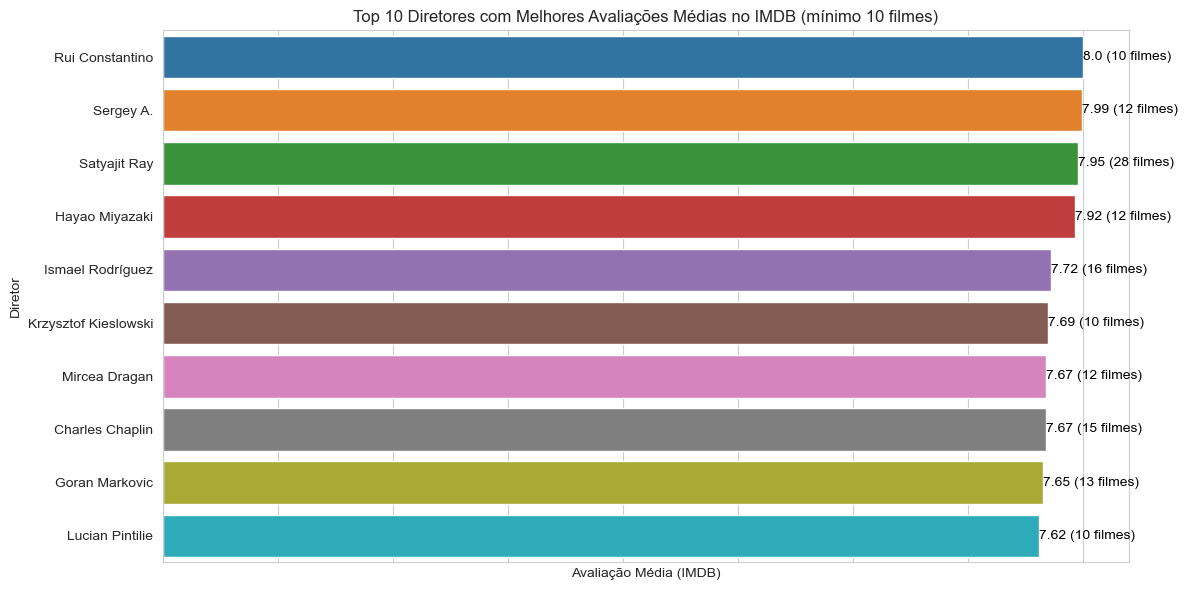

In [6]:
# Calculando a m√©dia de avalia√ß√£o e a contagem de filmes para cada diretor
avg_rating_por_diretor = df.groupby('diretor')['imdb_rating'].agg(['mean', 'count']).reset_index()

# Filtrando diretores que t√™m no m√≠nimo 10 filmes
diretores_min_10_filmes = avg_rating_por_diretor[avg_rating_por_diretor['count'] >= 10]

# Ordenando os diretores pela avalia√ß√£o m√©dia em ordem decrescente e pegando os top diretores
top_diretores = diretores_min_10_filmes.sort_values(by='mean', ascending=False).head(10)

# Definindo o estilo dos gr√°ficos
sns.set_style("whitegrid")

# Criando um gr√°fico de barras para os top diretores baseado apenas na avalia√ß√£o m√©dia e n√∫mero de filmes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_diretores, x='mean', y='diretor', palette="tab10")
plt.title('Top 10 Diretores com Melhores Avalia√ß√µes M√©dias no IMDB (m√≠nimo 10 filmes)')
plt.xlabel('Avalia√ß√£o M√©dia (IMDB)')
plt.ylabel('Diretor')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Removendo a numera√ß√£o no eixo x

# Adicionando o n√∫mero de filmes na barra
for index, value in enumerate(top_diretores['mean']):
    plt.text(value, index, f"{round(value, 2)} ({top_diretores['count'].iloc[index]} filmes)", color='black', va="center")

# Ajustando o layout e mostrando o gr√°fico
plt.tight_layout()
plt.show()


In [7]:
# Filtrando o dataframe original para incluir apenas filmes dos top 10 diretores
top_diretores_nomes = top_diretores['diretor'].tolist()
df_top_diretores = df[df['diretor'].isin(top_diretores_nomes)]

# Fun√ß√£o para calcular a porcentagem de filmes de cada g√™nero prim√°rio para cada diretor
def calc_porcentagem_generos_primarios(df, diretores):
    resultado = []
    for diretor in diretores:
        # Filtrando os filmes do diretor
        filmes_diretor = df[df['diretor'] == diretor]
        
        # Contando a frequ√™ncia de cada g√™nero prim√°rio
        generos_primarios_count = filmes_diretor['genero_primario'].value_counts()
        
        # Calculando a porcentagem
        generos_primarios_porcentagem = (generos_primarios_count / generos_primarios_count.sum()) * 100
        
        # Adicionando ao resultado
        resultado.append({'diretor': diretor, 'generos_primarios_porcentagem': generos_primarios_porcentagem})
    
    return resultado

# Calculando as porcentagens de g√™neros prim√°rios para cada um dos top 10 diretores
generos_primarios_por_diretor = calc_porcentagem_generos_primarios(df_top_diretores, top_diretores_nomes)

# Exibindo os resultados
for item in generos_primarios_por_diretor:
    print(f"Diretor: {item['diretor']}")
    print(item['generos_primarios_porcentagem'])
    print("-" * 40)

Diretor: Rui Constantino
genero_primario
Action    100.0
Name: count, dtype: float64
----------------------------------------
Diretor: Sergey A.
genero_primario
Horror       50.000000
Action       16.666667
Fantasy       8.333333
Drama         8.333333
Adventure     8.333333
Sci-Fi        8.333333
Name: count, dtype: float64
----------------------------------------
Diretor: Satyajit Ray
genero_primario
Drama        67.857143
Comedy       17.857143
Adventure    10.714286
Crime         3.571429
Name: count, dtype: float64
----------------------------------------
Diretor: Hayao Miyazaki
genero_primario
Animation    100.0
Name: count, dtype: float64
----------------------------------------
Diretor: Ismael Rodr√≠guez
genero_primario
Comedy       50.00
Drama        43.75
Adventure     6.25
Name: count, dtype: float64
----------------------------------------
Diretor: Krzysztof Kieslowski
genero_primario
Drama     70.0
Comedy    20.0
Crime     10.0
Name: count, dtype: float64
-----------------

**Influ√™ncia do G√™nero nas Avalia√ß√µes:** Embora certos g√™neros possam ter uma m√©dia de avalia√ß√£o geralmente mais baixa ou mais alta, os top diretores demonstram que a qualidade da dire√ß√£o pode superar as expectativas do g√™nero. Por exemplo, Sergey A. se destaca com filmes de terror altamente avaliados, apesar do g√™nero ser conhecido por ter uma m√©dia de avalia√ß√£o menor. Isso sugere que a habilidade e o talento do diretor podem elevar a percep√ß√£o e a recep√ß√£o de g√™neros geralmente menos valorizados.

**Especializa√ß√£o de G√™nero:** Muitos dos top diretores mostram uma clara especializa√ß√£o em certos g√™neros. Hayao Miyazaki √© renomado por seus filmes de anima√ß√£o, enquanto Charles Chaplin √© inconfund√≠vel no g√™nero com√©dia. Essa especializa√ß√£o indica uma afinidade e maestria em contar hist√≥rias dentro de um espectro particular, o que pode ser um fator-chave em suas altas avalia√ß√µes.

**Diversidade de Portf√≥lios:** Enquanto alguns diretores se destacam em g√™neros espec√≠ficos, outros, como Satyajit Ray e Ismael Rodr√≠guez, mostram uma diversidade impressionante em seus portf√≥lios. Isso reflete uma versatilidade na dire√ß√£o e a capacidade de contar hist√≥rias em v√°rios contextos e estilos, o que pode ser atraente para um p√∫blico mais amplo e contribuir para uma maior m√©dia de avalia√ß√£o.

**Inspira√ß√£o e Aprendizado:** Os top diretores servem como fonte de inspira√ß√£o para cineastas emergentes e estabelecidos. Estudar suas filmografias, abordagens narrativas e t√©cnicas de dire√ß√£o pode oferecer insights valiosos sobre o que torna seus filmes bem-sucedidos. Por exemplo, a forma como Hayao Miyazaki infunde elementos culturais japoneses em suas anima√ß√µes ou a habilidade de Krzysztof Kieslowski em tecer elementos de romance e drama podem servir de inspira√ß√£o para diretores que buscam aprimorar sua pr√≥pria arte.

**Reconhecimento al√©m da Fama:** Os dados revelam que a fama e o reconhecimento de um diretor n√£o s√£o sempre sin√¥nimos de avalia√ß√µes altas. Diretores como Rui Constantino, que podem n√£o ser amplamente conhecidos pelo p√∫blico mainstream, ainda assim alcan√ßam altas avalia√ß√µes, demonstrando que a qualidade do trabalho pode se destacar independentemente da fama. Isso destaca a import√¢ncia de olhar al√©m dos nomes mais reconhecidos da ind√∫stria e valorizar o talento onde quer que ele seja encontrado.

**Planejamento de Produ√ß√£o e Descoberta de Talentos:** A an√°lise das especializa√ß√µes dos diretores pode ser uma ferramenta valiosa para a ind√∫stria cinematogr√°fica. Investir em diretores com sucesso comprovado em g√™neros espec√≠ficos pode alavancar tend√™ncias de mercado e prefer√™ncias do p√∫blico. Al√©m disso, a identifica√ß√£o de diretores menos conhecidos, como Rui Constantino, pode revelar talentos ocultos. A considera√ß√£o de diretores menos conhecidos, mas altamente avaliados, pode ser uma estrat√©gia lucrativa, visto que muitos deles podem n√£o ter or√ßamento para criar filmes possibilidades de emplacar.


# Exploratory Data Analysis (EDA) of Films

## Contexto do Neg√≥cio üíº

A ind√∫stria cinematogr√°fica √© uma das mais vibrantes e influentes globalmente, afetando n√£o apenas a economia, mas tamb√©m a cultura e a sociedade. Com milhares de filmes lan√ßados a cada ano, profissionais da ind√∫stria, pesquisadores e entusiastas do cinema buscam constantemente entender as tend√™ncias, prefer√™ncias do p√∫blico e fatores que contribuem para o sucesso de um filme.

## Objetivo üéØ

O objetivo principal deste projeto √© coletar, tratar e analisar dados sobre filmes de diversas √©pocas e g√™neros para gerar insights que possam ser √∫teis para profissionais da ind√∫stria, pesquisadores ou entusiastas do cinema.

## Lista de T√≥picos üìå

- Vis√£o Geral
- Ferramentas e tecnologias utilizadas
- Coleta de Dados
- Limpeza e Pr√©-Processamento de Dados
- An√°lise Explorat√≥ria de Dados (EDA) e visualiza√ß√µes
- Conclus√µes

## Vis√£o Geral
Ao longo desse README, est√£o somente as an√°lises e explica√ß√µes mais importantes. Os c√≥digos e procedimentos est√£o mais detalhados no Jupyter Notebook, assim como an√°lises adicionais menos importantes, ou seja, que n√£o geraram insights significativos. O notebook pode ser encontrado neste reposit√≥rio.

### Etapa 1: Coleta de dados:
Gerar fun√ß√µes que interajam com a API OMDb para coletar de forma automatizada um conjunto de dados abrangente de filmes.

### Etapa 2: Limpeza e pr√©-processamento dos dados:
Empregar m√©todos de limpeza de dados e pr√©-processamento para garantir que o conjunto de dados esteja em um estado ideal para an√°lise. Isso inclui tratamento de valores ausentes e transforma√ß√µes dos dados, assim como a identifica√ß√£o e remo√ß√£o de outliers.

### Etapa 3: An√°lise explorat√≥ria de dados (EDA) e visualiza√ß√µes:
Implementar uma an√°lise explorat√≥ria abrangente, utilizando estat√≠sticas descritivas e t√©cnicas de an√°lise de dados para identificar padr√µes, tend√™ncias e poss√≠veis correla√ß√µes nos dados. Partindo de an√°lises unidimensionais at√© bidimensionais. Assim como, criar uma s√©rie de visualiza√ß√µes de dados impactantes e informativas que complementem e aprimorem os insights gerados durante a fase de an√°lise explorat√≥ria.

### Etapa 4: Conclus√µes:
Com base na an√°lise explorat√≥ria de dados e nas visualiza√ß√µes, sintetizar os principais insights e descobertas obtidos a partir do conjunto de dados e sugerir √°reas de pesquisa e an√°lise futuras que podem ser exploradas para aprofundar o entendimento sobre o tema e gerar novos insights.

## Ferramentas e Tecnologias Utilizadas

- **Python**: Linguagem de programa√ß√£o principal do projeto.
- **Pandas**: Biblioteca do Python para manipula√ß√£o e an√°lise de dados.
- **Requests**: Ferramenta utilizada para realizar requisi√ß√µes HTTP √† API OMDb durante o processo de coleta de dados.
- **Matplotlib e Seaborn**: Bibliotecas do Python para visualiza√ß√£o de dados.

## Coleta de Dados

- A coleta de dados foi realizada em duas etapas: inicialmente, coletamos os ID's dos filmes que queremos obter os dados. Estes IDs s√£o ent√£o utilizados como par√¢metros para solicita√ß√µes √† API OMDb, a fim de obter o conjunto de dados.
  
- A sele√ß√£o de filmes para esta an√°lise foi restrita √†queles que receberam um m√≠nimo de 150 avalia√ß√µes de usu√°rios. Este crit√©rio foi estabelecido para garantir que as notas dos filmes sejam confi√°veis e representativas da percep√ß√£o geral do p√∫blico sobre um determinado filme.

- O limite de 150 avalia√ß√µes serve como um ponto de equil√≠brio: √© alto o suficiente para conferir credibilidade √†s notas, mas baixo o suficiente para evitar a introdu√ß√£o de um vi√©s de popularidade. Isso permite que filmes menos conhecidos, mas ainda bem avaliados, sejam inclusos na an√°lise, oferecendo um panorama mais abrangente do cen√°rio cinematogr√°fico.

- Foram definidas fun√ß√µes espec√≠ficas para a coleta. A amostra bruta de dados ficou com um total de 94.785 filmes.

## Limpeza e Pr√©-Processamento de Dados

Nessa etapa foi utilizado principalmente o Pandas para limpeza e transforma√ß√£o dos dados. As principais a√ß√µes realizadas foram:
- Verifica√ß√£o e remo√ß√£o de dados faltantes: Valores nulos e inclusive dados N/A em forma de string;
- Verifica√ß√£o e remo√ß√£o de duplicatas;
- Verifica√ß√£o e convers√£o dos tipos dos dados;
- Transforma√ß√£o da coluna g√™neros: Essa coluna estava preenchida como uma lista, podendo variar at√© 3 g√™neros em cada linha do dataset. Foi aplicada uma transforma√ß√£o para separar essa coluna em 3 colunas distintas (g√™nero prim√°rio, secund√°rio e terci√°rio).
- Detec√ß√£o de Outliers: Foi utilizado o m√©todo interquartil (IQR) para detectar os outliers das colunas `imdb_rating` e `duracao` e os resultados foram 1526 outliers para a coluna `imdb_rating` e 5753 para a coluna `duracao`. Os outliers foram ent√£o filtrados do dataset, visto que eles podem distorcer os resultados e afetar a qualidade das an√°lises estat√≠sticas. Para manter a integridade do estudo, os dados dos outliers foram salvos em um arquivo separado. Isso permitir√° uma an√°lise mais aprofundada no futuro, caso seja necess√°rio.

## Conjunto de dados üìä

O conjunto de dados ap√≥s a limpeza e transforma√ß√µes ficou da seguinte forma:

| Coluna             | Tipo     | Descri√ß√£o                                       |
|--------------------|----------|-------------------------------------------------|
| `titulo`           | `object` | T√≠tulo do filme                                 |
| `ano`              | `int64`  | Ano que o filme foi lan√ßado                     |
| `imdb_rating`      | `float64`| Classifica√ß√£o do IMDb (nota dada pelos usu√°rios)|
| `imdb_votes`       | `int64`  | N√∫mero de votos dados pelos usu√°rios do site    |
| `duracao`          | `float64`| Dura√ß√£o do filme em minutos                     |
| `diretor`          | `object` | Diretor respons√°vel pelo filme                  |
| `genero_primario`  | `object` | G√™nero principal do filme                       |
| `genero_secundario`| `object` | Subg√™nero secund√°rio do filme                   |
| `genero_terciario` | `object` | Subg√™nero terci√°rio do filme                    |


Ap√≥s inspe√ß√µes qualitativas, foi poss√≠vel constatar que os g√™neros estavam em ordem de import√¢ncia no conjunto de dados, sendo o primeiro g√™nero da lista aquele que √© mais predominante no filme, essa √© a raz√£o pela qual essa separa√ß√£o foi adotada.

## An√°lise Explorat√≥ria de Dados (EDA) e Visualiza√ß√µes

A an√°lise explorat√≥ria foi divida em tr√™s etapas:
1. Obten√ß√£o das estat√≠sticas descritivas b√°sicas
2. An√°lises unidimensionais
3. An√°lises bidimensionais
Foram utilizadas em conjunto as bibliotecas Pandas, Matplotlib e Seaborn.

### Estat√≠sticas descritivas b√°sicas:

**Ano (`ano`)**
- A base de dados cont√©m filmes lan√ßados entre 1906 e 2023.
- A m√©dia de lan√ßamento dos filmes √© aproximadamente 1996, o que sugere que a cole√ß√£o √© bastante diversificada em termos de √©poca.
    
**Classifica√ß√£o do IMDb (`imdb_rating`)**
- A m√©dia da classifica√ß√£o √© de aproximadamente 5.87, com um desvio padr√£o de 1.15, indicando uma varia√ß√£o moderada nas classifica√ß√µes.
- As classifica√ß√µes variam de 2.7 a 9.1, conforme os limites definidos durante a remo√ß√£o de outliers.

**N√∫mero de Votos no IMDb (`imdb_votes`)**
- O n√∫mero m√©dio de votos por filme √© de aproximadamente 10,344.
- O n√∫mero de votos varia significativamente, com um desvio padr√£o elevado de 53,072.
  
**Dura√ß√£o (`duracao`)**
- A dura√ß√£o m√©dia dos filmes √© de aproximadamente 98 minutos.
- A dura√ß√£o varia de 57 a 140 minutos, com um desvio padr√£o de aproximadamente 15.5 minutos.

**G√™nero Prim√°rio (`genero_primario`)**
- O conjunto de dados cont√©m 21 g√™neros prim√°rios √∫nicos.
- "Drama" √© o g√™nero mais comum, aparecendo 25,311 vezes.

**G√™nero Secund√°rio (`genero_secundario`)**
- Existem 24 g√™neros secund√°rios √∫nicos.
- "Drama" tamb√©m √© o g√™nero secund√°rio mais comum.

**G√™nero Terci√°rio (`genero_terciario`)**
- Existem 21 g√™neros terci√°rios √∫nicos.
- "Thriller" √© o g√™nero terci√°rio mais comum.

**Diretor (`diretor`)**
- H√° 35,940 diretores √∫nicos no conjunto de dados.
- Jes√∫s Franco √© o diretor mais frequentemente listado, com 92 filmes.
    
### An√°lises Unidimensionais:

![Vari√°veis num√©ricas](images/distribuicao_variaveis_numericas.png)

**Distribui√ß√£o do Ano de Lan√ßamento**:
- A maioria dos filmes no conjunto de dados foi lan√ßada ap√≥s o ano 2000.
- H√° uma tend√™ncia crescente de filmes ap√≥s esse ano. Isso pode sugerir que o avan√ßo tecnol√≥gico facilitou a produ√ß√£o de filmes, resultando em um aumento no n√∫mero de lan√ßamentos.
- A diminui√ß√£o recente se deve em rela√ß√£o √† pandemia do COVID-19, que resultou em uma paralisa√ß√£o nas  produ√ß√µes.

**Distribui√ß√£o da Classifica√ß√£o IMDb**:
- A distribui√ß√£o das classifica√ß√µes do IMDb √© aproximadamente normal.
- A maior parte dos filmes tem classifica√ß√µes entre 5 e 7.
- A distribui√ß√£o √© levemente inclinada para a esquerda, o que indica que filmes com classifica√ß√µes extremamente altas s√£o mais raros do que aqueles com classifica√ß√µes baixas.

**Distribui√ß√£o do N√∫mero de Votos no IMDb**:
- A coleta foi filtrada para incluir apenas filmes com pelo menos 150 votos.
- O uso da escala logar√≠tmica no eixo \(x\) revela que a maioria dos filmes tem relativamente poucos votos.
- Isso sugere que a quantidade de votos n√£o √© necessariamente um indicativo de representatividade ou qualidade do filme.

**Distribui√ß√£o da Dura√ß√£o do Filme**:
- A dura√ß√£o dos filmes segue uma distribui√ß√£o normal, centrada em torno de 95 a 100 minutos.
- A maioria dos filmes tem uma dura√ß√£o que varia de 80 a 120 minutos.
- Isso sugere que a "dura√ß√£o padr√£o" para a maioria dos filmes √© de aproximadamente 1,5 a 2 horas.

![G√™neros e subg√™neros](images/frequencia_generos_e_subgeneros.png)

- O **Drama** √© um g√™nero extremamente popular, tanto como g√™nero principal quanto como subg√™nero. Isso pode indicar que muitos filmes buscam contar hist√≥rias profundas e envolventes que ressoam emocionalmente com o p√∫blico.
- A presen√ßa significativa de **Romance** e **Thriller** como subg√™neros sugere que muitos filmes, independentemente de seu g√™nero principal, incorporam elementos rom√¢nticos e/ou de suspense, possivelmente para ampliar seu apelo ao p√∫blico. √â interessante ressaltar que estes g√™neros s√£o pouco usados como g√™nero principal, o que sugere que eles n√£o s√£o suficientes para sustentar uma trama por si s√≥.
- A diversidade de g√™neros e subg√™neros reflete a riqueza e variedade do cinema. Filmes frequentemente mesclam diferentes g√™neros para criar narrativas complexas e multidimensionais.

### An√°lises Bidimensionais:

![Mapa de Calor](images/mapa_de_calor.png)

- Os filmes que possuem uma quantidade maior de votos no IMDb tendem a ter classifica√ß√µes ligeiramente mais altas, o que pode indicar uma combina√ß√£o de popularidade e qualidade.
- H√° uma tend√™ncia leve, mas not√°vel, de filmes mais longos receberem classifica√ß√µes mais altas. Isso pode refletir uma prefer√™ncia por tramas mais detalhadas ou desenvolvidas.
- Filmes mais recentes t√™m uma ligeira tend√™ncia de receber classifica√ß√µes mais baixas. Pode ser interessante investigar se isso √© um reflexo de mudan√ßas nas expectativas do p√∫blico ou outras din√¢micas da ind√∫stria cinematogr√°fica.
- O aumento gradual na dura√ß√£o dos filmes ao longo do tempo pode ser reflexo de mudan√ßas nas conven√ß√µes cinematogr√°ficas, tecnologias de produ√ß√£o ou prefer√™ncias do p√∫blico.

Essas observa√ß√µes, embora baseadas em correla√ß√µes fraca a moderada, fornecem insights √∫teis sobre as tend√™ncias e rela√ß√µes nos dados. No entanto, √© importante lembrar que correla√ß√£o n√£o implica causalidade, e uma an√°lise mais aprofundada seria necess√°ria para fazer afirma√ß√µes definitivas.

![Classifica√ß√£o IMDB X Ano de Lan√ßamento](images/classificacaoimdb_ano.png)

**Era de Ouro do Cinema**: Filmes lan√ßados antes de 1960 tendem a ter uma m√©dia de classifica√ß√£o mais alta. Isso pode refletir o "efeito de nostalgia", onde filmes mais antigos s√£o vistos como cl√°ssicos e, consequentemente, recebem classifica√ß√µes mais altas. Outra possibilidade √© que somente os melhores filmes daquela √©poca tenham perdurado e sejam mais amplamente reconhecidos, enquanto filmes menos memor√°veis tenham sido esquecidos.

**Decad√™ncia ap√≥s os anos 1960**: H√° um decl√≠nio percept√≠vel nas m√©dias das classifica√ß√µes a partir dos anos 1960. A democratiza√ß√£o do cinema e da cr√≠tica pode ter ampliado a diversidade de avalia√ß√µes, resultando em m√©dias mais baixas. Al√©m disso, o aumento na quantidade de filmes produzidos pode ter contribu√≠do para essa queda, com uma dilui√ß√£o da qualidade m√©dia.

**Ressurgimento Recente**: A m√©dia das classifica√ß√µes mostra uma ligeira recupera√ß√£o nos anos mais recentes (2021-2023). Isso pode ser o resultado de uma mudan√ßa nas avalia√ß√µes ou uma melhoria na qualidade dos filmes. A pandemia de COVID-19 tamb√©m pode ter desempenhado um papel, influenciando tanto a produ√ß√£o quanto a percep√ß√£o dos filmes durante esse per√≠odo.

**Flutua√ß√µes em Filmes Anteriores a 1960**: Filmes anteriores a 1960 apresentam flutua√ß√µes not√°veis nas m√©dias anuais. Devido ao menor n√∫mero de filmes desses anos presentes no conjunto de dados, as m√©dias s√£o mais sens√≠veis a avalia√ß√µes extremas, resultando em varia√ß√µes mais pronunciadas.

Estes insights proporcionam uma vis√£o abrangente das tend√™ncias nas avalia√ß√µes de filmes ao longo dos anos, destacando per√≠odos de destaque e mudan√ßas not√°veis na percep√ß√£o do p√∫blico.

![Dura√ß√£o X Ano de Lan√ßamento](images/duracao_ano.png)

**Era dos Filmes Curtos**: Nos prim√≥rdios do cinema, especialmente em torno de 1920, os filmes eram consideravelmente mais curtos, com uma m√©dia de dura√ß√£o de cerca de 52 minutos. Isso provavelmente reflete as limita√ß√µes tecnol√≥gicas e de produ√ß√£o da √©poca, restringindo a extens√£o dos filmes.

**Ascens√£o da Narrativa Cinematogr√°fica**: H√° um aumento progressivo na dura√ß√£o dos filmes do final dos anos 1920 at√© meados dos anos 1970, atingindo uma m√©dia de 100 minutos. Este fen√¥meno pode ser o resultado do amadurecimento da ind√∫stria cinematogr√°fica, com tramas mais complexas e produ√ß√µes mais ambiciosas exigindo mais tempo de tela.

**Norma da Ind√∫stria**: Ap√≥s o aumento sustentado, a dura√ß√£o m√©dia dos filmes estabiliza-se, oscilando levemente em torno de 100 minutos por v√°rias d√©cadas at√© os anos 2020. Isso indica a consolida√ß√£o de uma norma industrial quanto ao tempo de dura√ß√£o "ideal" de um filme, equilibrando a necessidade de desenvolvimento narrativo com as prefer√™ncias do p√∫blico.

**Era de Experi√™ncias Cinematogr√°ficas Expansivas**: A partir de 2021, nota-se um aumento na dura√ß√£o m√©dia dos filmes, sugerindo uma mudan√ßa nas prefer√™ncias tanto dos criadores quanto dos espectadores. Inicialmente impulsionado pelo contexto da pandemia, que pode ter favorecido conte√∫dos mais longos para p√∫blicos confinados, este aumento na dura√ß√£o dos filmes parece se sustentar al√©m desse per√≠odo. Isso pode refletir um interesse crescente em experi√™ncias cinematogr√°ficas mais imersivas e detalhadas.

**A "Dura√ß√£o Ideal"**: Em m√©dia, ao longo dos anos, os filmes tendem a durar cerca de 102 minutos. Esta "dura√ß√£o ideal" ressoa com a expectativa do p√∫blico e se adapta a uma ampla variedade de g√™neros e narrativas, demonstrando que, independentemente das tend√™ncias temporais, existe uma prefer√™ncia consistente que molda a produ√ß√£o cinematogr√°fica.

![Classifica√ß√£o IMDb X G√™nero Prim√°rio](images/box_plot_genero_primario.png)

**G√™neros Mais Altamente Avaliados**:
- **Biografia**: Com uma mediana de 6.6, o g√™nero biografia se destaca como o mais bem avaliado, refletindo a aprecia√ß√£o do p√∫blico por hist√≥rias baseadas em eventos e personalidades reais.
- **Anima√ß√£o**: Com uma mediana de 6.5, este g√™nero demonstra uma forte prefer√™ncia, especialmente considerando que anima√ß√µes muitas vezes atraem p√∫blicos de todas as idades.
- **Drama**: Consistindo no maior n√∫mero de filmes, o g√™nero drama tem uma mediana de 6.4, o que √© um testemunho de sua popularidade e aceita√ß√£o ampla pelo p√∫blico.

**G√™neros Menos Favorecidos**:
- **Terror**: Apesar de ser um g√™nero popular com um grande n√∫mero de filmes, o terror tem uma mediana de 4.6, indicando que o p√∫blico deste g√™nero √© bastante quanto √† qualidade do filme.
- **Sci-Fi**: Com uma mediana de 4.5, o g√™nero de fic√ß√£o cient√≠fica, embora possa ter um seguimento cult, tem uma m√©dia de classifica√ß√£o relativamente baixa.
  
**Intervalo de Varia√ß√µes Dentro dos G√™neros**:
A varia√ß√£o dentro dos g√™neros, como indicado pelos quartis, mostra que enquanto alguns g√™neros t√™m avalia√ß√µes consistentemente altas ou baixas, outros, como **Guerra** e **A√ß√£o**, t√™m uma ampla gama de avalia√ß√µes, como indicado pelo tamanho do box plot. Isso indica que a qualidade dos filmes desses g√™neros s√£o mais suscet√≠veis a serem influenciadas por outros fatores do que, por exemplo, o g√™nero **Biografia** que, apesar de ter avalia√ß√µes diversificadas, tem notas consistentemente mais altas e dentro de um intervalo menor.

![G√™nero Prim√°rio X Subg√™nero](images/genero_primario_subgenero.png)

Obs: Nesta an√°lise, os g√™neros secund√°rio e terci√°rio foram tratados como subg√™nero, a fim de facilitar a compara√ß√£o entre os g√™neros prim√°rios e por n√£o haver uma diferen√ßa significativa entre um g√™nero secund√°rio e terci√°rio em um filme, sendo eles tratados como complementares

**Realce atrav√©s do Subg√™nero**: De modo geral, um g√™nero frequentemente obt√©m avalia√ß√µes mais altas quando √© integrado como subg√™nero. Isso sugere que a introdu√ß√£o de determinados temas ou estilos cinematogr√°ficos como elementos complementares pode real√ßar a narrativa principal, tornando-a mais envolvente para o p√∫blico.

**O Poder da Combina√ß√£o**: G√™neros como **Hist√≥ria**, **Guerra**, **A√ß√£o** e **Aventura** exemplificam essa tend√™ncia. Quando posicionados como g√™neros principais, podem n√£o ter o mesmo impacto no p√∫blico. No entanto, ao serem introduzidos como subg√™neros, enriquecendo a narrativa principal de outro g√™nero, a rea√ß√£o do p√∫blico tende a ser mais favor√°vel.

**Exce√ß√µes Not√°veis**: Contudo, h√° g√™neros que desafiam essa tend√™ncia geral. **Musical**, **Drama** e **Crime**, por exemplo, tendem a ser mais bem avaliados quando s√£o o g√™nero principal do filme. Isso destaca sua for√ßa intr√≠nseca e a capacidade de se manterem como pilares narrativos centrais, sem a necessidade de serem complementados por outros g√™neros.

**A Arte da Narrativa Cinematogr√°fica**: Esses padr√µes sublinham a versatilidade e a complexidade da narrativa cinematogr√°fica. A habilidade de mesclar e harmonizar g√™neros pode criar experi√™ncias mais imersivas, enquanto certos g√™neros ret√™m sua for√ßa e apelo, independentemente de sua posi√ß√£o na estrutura da hist√≥ria.

![G√™nero Prim√°rio Sozinho X Combinado](images/genero_primario_isolado_vs_combinado.png)

**Interpreta√ß√£o de G√™neros Tradicionalmente "Puros"**: G√™neros como "Esporte", "Music" e "Hist√≥ria" t√™m uma queda significativa em suas avalia√ß√µes quando combinados com outros subg√™neros. Isso pode sugerir que o p√∫blico prefere uma abordagem mais "pura" ou tradicional para esses tipos de filmes. Por exemplo, os espectadores podem preferir filmes esportivos que se concentram estritamente em esportes, sem a introdu√ß√£o de elementos de outros g√™neros.

**Versatilidade de G√™neros Populares**: G√™neros como "A√ß√£o", "Crime" e "Guerra" experimentam um aumento nas avalia√ß√µes quando combinados com outros g√™neros. Isso indica que a inclus√£o de elementos de outros g√™neros pode enriquecer a narrativa ou tornar o filme mais din√¢mico e interessante para o p√∫blico. Por exemplo, um filme de a√ß√£o com elementos de mist√©rio ou romance pode ser mais envolvente do que um filme de a√ß√£o puro.

**Neutralidade de Certos G√™neros**: G√™neros como "Biografia", "Romance" e "Musical" mostram varia√ß√µes m√≠nimas, sugerindo que a combina√ß√£o com outros subg√™neros n√£o tem um impacto significativo nas avalia√ß√µes. Isso pode indicar que a ess√™ncia desses g√™neros permanece intacta, independentemente da introdu√ß√£o de elementos de outros g√™neros.

**Implica√ß√µes para Produtores e Diretores**: Ao decidir o g√™nero e a narrativa de um filme, os cineastas podem considerar essas tend√™ncias. Se estiverem produzindo um filme esportivo, por exemplo, pode ser ben√©fico manter-se fiel ao g√™nero. Por outro lado, se estiverem se aventurando em um filme de a√ß√£o, a introdu√ß√£o de subg√™neros pode ser uma boa estrat√©gia.

![Melhores Subg√™neros para Romance](images/script_melhores_subgeneros_romance.png)

![Melhores Subg√™neros para Drama](images/script_melhores_subgeneros_drama.png)

Acima se encontra exemplos de visualiza√ß√µes que foram geradas por meio de uma fun√ß√£o personalizada, o intuito √© fornecer uma ferramenta onde √© poss√≠vel observar quais subgen√™ros tem o maior poder de impactar a nota de um filme de determinado g√™nero prim√°rio.

**Ferramenta de Decis√£o para Cineastas**: O script √© extremamente √∫til para cineastas que desejam entender o impacto de combinar diferentes subg√™neros com um g√™nero prim√°rio. Ao visualizar a varia√ß√£o percentual, os cineastas podem tomar decis√µes informadas sobre quais subg√™neros introduzir em um filme para potencialmente aumentar sua popularidade e avalia√ß√£o.

**Evitando Combina√ß√µes Desfavor√°veis**: Da mesma forma, ao identificar subg√™neros que podem diminuir a avalia√ß√£o m√©dia, os cineastas podem optar por evitar certas combina√ß√µes ou abordar a narrativa de uma maneira que neutralize poss√≠veis rejei√ß√µes.

**Flexibilidade e Customiza√ß√£o**: O script oferece flexibilidade, pois permite que os usu√°rios escolham qualquer g√™nero prim√°rio e visualizem o impacto dos subg√™neros. Isso √© valioso porque os cineastas podem adaptar sua abordagem com base no g√™nero espec√≠fico de filme que est√£o produzindo.

![Propor√ß√£o de Filmes Lan√ßados por Ano e por G√™nero Prim√°rio](images/proporcao__generos_primarios.png)
![Visualiza√ß√£o Multifacetada dos G√™neros Prim√°rios](images/multifacetada_primarios.png)
![Propor√ß√£o de Filmes Lan√ßados por Ano e por Subg√™nero](images/proporcao_subgeneros.png)
![Visualiza√ß√£o Multifacetada dos Subg√™neros](images/multifacetada_subgeneros.png)

As visualiza√ß√µes acima tratam da propor√ß√£o de filmes com determinados g√™neros e subg√™neros lan√ßados por ano. O intuito √© fornecer informa√ß√µes a respeito da popularidade de certos g√™neros, assim como explorar poss√≠veis tend√™ncias.

**Preval√™ncia de Drama**: A an√°lise mostra que o g√™nero Drama mant√©m uma presen√ßa dominante ao longo dos anos, tanto como g√™nero prim√°rio quanto subg√™nero. Esta observa√ß√£o indica uma prefer√™ncia cont√≠nua por narrativas dram√°ticas, talvez devido √† sua capacidade universal de resson√¢ncia com experi√™ncias humanas mais profundas.

**Evolu√ß√£o dos G√™neros Prim√°rios**: H√° um aumento not√°vel na produ√ß√£o de filmes de "Anima√ß√£o", que pode ser correlacionado com avan√ßos tecnol√≥gicos e a alta aceita√ß√£o do p√∫blico para esse g√™nero. G√™neros como "A√ß√£o" e "Thriller" tamb√©m mostram um crescimento, o que pode ser interpretado como uma prefer√™ncia por tramas mais intensas e din√¢micas.

**Evolu√ß√£o dos Subg√™neros**: O subg√™nero "Thriller" apresenta um crescimento expressivo, passando de 4% para 18% em propor√ß√£o nos √∫ltimos 100 anos. Isso pode refletir um interesse crescente por tramas complexas e tensas. J√° o subg√™nero "Mist√©rio" mostra uma curva em forma de "U", sugerindo uma ressurg√™ncia ap√≥s um per√≠odo de decl√≠nio, possivelmente devido a um renovado interesse em enigmas e mist√©rios. Vale ressaltar que os dois subg√™neros se complementam muito bem, o que comprova que essa popularidade observada √© verdadeira.

**Tend√™ncias de baixa**: Alguns g√™neros prim√°rios, como "Aventura" e "Crime", demonstram uma queda na sua propor√ß√£o ao longo dos anos. Isso pode ser um indicativo de satura√ß√£o da ind√∫stria ou mudan√ßas nas prefer√™ncias do p√∫blico. Entre os subg√™neros, "Romance", "Music", "Musical" e "Guerra" mostram uma tend√™ncia de baixa, possivelmente refletindo uma procura por narrativas mais contempor√¢neas e menos idealizadas.

**Planejamento de Produ√ß√£o**: Essas observa√ß√µes s√£o valiosas para produtores e est√∫dios na tomada de decis√µes estrat√©gicas. A an√°lise das tend√™ncias pode orientar investimentos em g√™neros em ascens√£o ou na explora√ß√£o de nichos menos saturados, oferecendo oportunidades para inova√ß√£o e diferencia√ß√£o.

**Decis√µes de Roteiro**: Para roteiristas, entender as tend√™ncias de g√™nero √© fundamental. A popularidade crescente de g√™neros como "Thriller" e "Mist√©rio" pode incentiv√°-los a desenvolver hist√≥rias que se alinhem com essas prefer√™ncias, ao mesmo tempo em que exploram novas formas de revitalizar g√™neros em decl√≠nio.

![Top 10 Diretores](images/top10_diretores.png)

| Diretor             | G√™nero Prim√°rio | Porcentagem (%) |
|---------------------|-----------------|-----------------|
| Rui Constantino     | Action          | 100.0           |
| Sergey A.           | Horror          | 50.0            |
|                     | Action          | 16.67           |
|                     | Fantasy         | 8.33            |
|                     | Drama           | 8.33            |
|                     | Adventure       | 8.33            |
|                     | Sci-Fi          | 8.33            |
| Satyajit Ray        | Drama           | 67.86           |
|                     | Comedy          | 17.86           |
|                     | Adventure       | 10.71           |
|                     | Crime           | 3.57            |
| Hayao Miyazaki      | Animation       | 100.0           |
| Ismael Rodr√≠guez    | Comedy          | 50.0            |
|                     | Drama           | 43.75           |
|                     | Adventure       | 6.25            |
| Krzysztof Kieslowski| Drama           | 70.0            |
|                     | Comedy          | 20.0            |
|                     | Crime           | 10.0            |
| Mircea Dragan       | Action          | 41.67           |
|                     | Comedy          | 25.0            |
|                     | Adventure       | 16.67           |
|                     | Drama           | 8.33            |
|                     | Biography       | 8.33            |
| Charles Chaplin     | Comedy          | 80.0            |
|                     | Drama           | 13.33           |
|                     | Adventure       | 6.67            |
| Goran Markovic      | Comedy          | 61.54           |
|                     | Drama           | 23.08           |
|                     | Action          | 15.38           |
| Lucian Pintilie     | Drama           | 50.0            |
|                     | Comedy          | 30.0            |
|                     | Crime           | 10.0            |
|                     | Biography       | 10.0            |

**Influ√™ncia do G√™nero nas Avalia√ß√µes**: Embora certos g√™neros possam ter uma m√©dia de avalia√ß√£o geralmente mais baixa ou mais alta, os top diretores demonstram que a qualidade da dire√ß√£o pode superar as expectativas do g√™nero. Por exemplo, Sergey A. se destaca com filmes de terror altamente avaliados, apesar do g√™nero ser conhecido por ter uma m√©dia de avalia√ß√£o menor. Isso sugere que a habilidade e o talento do diretor podem elevar a percep√ß√£o e a recep√ß√£o de g√™neros geralmente menos valorizados.

**Especializa√ß√£o de G√™nero**: Muitos dos top diretores mostram uma clara especializa√ß√£o em certos g√™neros. Hayao Miyazaki √© renomado por seus filmes de anima√ß√£o, enquanto Charles Chaplin √© inconfund√≠vel no g√™nero com√©dia. Essa especializa√ß√£o indica uma afinidade e maestria em contar hist√≥rias dentro de um espectro particular, o que pode ser um fator-chave em suas altas avalia√ß√µes.

**Diversidade de Portf√≥lios**: Enquanto alguns diretores se destacam em g√™neros espec√≠ficos, outros, como Satyajit Ray e Ismael Rodr√≠guez, mostram uma diversidade impressionante em seus portf√≥lios. Isso reflete uma versatilidade na dire√ß√£o e a capacidade de contar hist√≥rias em v√°rios contextos e estilos, o que pode ser atraente para um p√∫blico mais amplo e contribuir para uma maior m√©dia de avalia√ß√£o.

**Inspira√ß√£o e Aprendizado**: Os top diretores servem como fonte de inspira√ß√£o para cineastas emergentes e estabelecidos. Estudar suas filmografias, abordagens narrativas e t√©cnicas de dire√ß√£o pode oferecer insights valiosos sobre o que torna seus filmes bem-sucedidos. Por exemplo, a forma como Hayao Miyazaki infunde elementos culturais japoneses em suas anima√ß√µes ou a habilidade de Krzysztof Kieslowski em tecer elementos de romance e drama podem servir de inspira√ß√£o para diretores que buscam aprimorar sua pr√≥pria arte.

**Reconhecimento al√©m da Fama**: Os dados revelam que a fama e o reconhecimento de um diretor n√£o s√£o sempre sin√¥nimos de avalia√ß√µes altas. Diretores como Rui Constantino, que podem n√£o ser amplamente conhecidos pelo p√∫blico mainstream, ainda assim alcan√ßam altas avalia√ß√µes, demonstrando que a qualidade do trabalho pode se destacar independentemente da fama. Isso destaca a import√¢ncia de olhar al√©m dos nomes mais reconhecidos da ind√∫stria e valorizar o talento onde quer que ele seja encontrado.

**Planejamento de Produ√ß√£o e Descoberta de Talentos:** A an√°lise das especializa√ß√µes dos diretores oferece insights valiosos para a ind√∫stria cinematogr√°fica. Apostar em diretores com √™xito comprovado em g√™neros espec√≠ficos pode capturar tend√™ncias de mercado e atender √†s prefer√™ncias do p√∫blico. Paralelamente, o reconhecimento de diretores menos conhecidos, como Rui Constantino, pode revelar talentos subaproveitados. Muitos desses diretores, apesar de talentosos, enfrentam limita√ß√µes or√ßament√°rias que restringem seu potencial criativo. Investir nesses cineastas n√£o s√≥ pode ser uma estrat√©gia lucrativa, mas tamb√©m pode trazer narrativas in√©ditas e inovadoras para o primeiro plano, diversificando e enriquecendo o cen√°rio cinematogr√°fico.

## Conclus√µes


## Licen√ßa

Este projeto est√° sob a licen√ßa MIT. Veja o arquivo [LICENSE](LICENSE) para mais detalhes.

## Cr√©ditos

Este projeto utiliza dados fornecidos pela [OMDb API](https://www.omdbapi.com/), que est√£o licenciados sob a [Creative Commons Attribution-NonCommercial 4.0 International License](https://creativecommons.org/licenses/by-nc/4.0/). Os dados foram utilizados para fins educacionais e n√£o comerciais neste projeto. Para fins de an√°lise, foram realizadas transforma√ß√µes e limpezas nos dados, mas sem alterar seu conte√∫do original de maneira substancial.

## Disclaimer
Este projeto foi desenvolvido exclusivamente para fins educacionais e de demonstra√ß√£o de habilidades. Ele n√£o tem nenhum objetivo comercial ou de lucro. Todos os dados utilizados neste projeto s√£o de dom√≠nio p√∫blico ou foram adquiridos e utilizados de acordo com as diretrizes e termos de uso fornecidos pelas respectivas fontes de dados.

As t√©cnicas de coleta de dados e an√°lise demonstradas aqui s√£o representativas das habilidades do autor em manipula√ß√£o de dados e desenvolvimento de software, e n√£o pretendem infringir quaisquer diretrizes ou leis de direitos autorais. Qualquer uso dos m√©todos ou dados apresentados neste projeto deve ser feito de acordo com as leis e regulamentos aplic√°veis.

## Contato
Seu Nome - seu_email@example.com

Link do Projeto: [https://github.com/seu_usuario/projeto-analise-dados-imdb](https://github.com/seu_usuario/projeto-analise-dados-imdb)
